# Capstone Winter Projects - Annuity IIT Gandhinagar
 - Jaidev Sanjay Khalane

## Project - Algorithmic Trading Strategy Development



In [28]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 1: Market Data Analysis

- Collect and preprocess historical stock market data (e.g., prices, volumes).
- Select a group of stocks or all stocks from indexes such as Nifty or Sensex for analysis.
- Identify patterns or signals indicative of trading opportunities.
- Visualize trends, patterns, and relationships in the data for initial insights.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


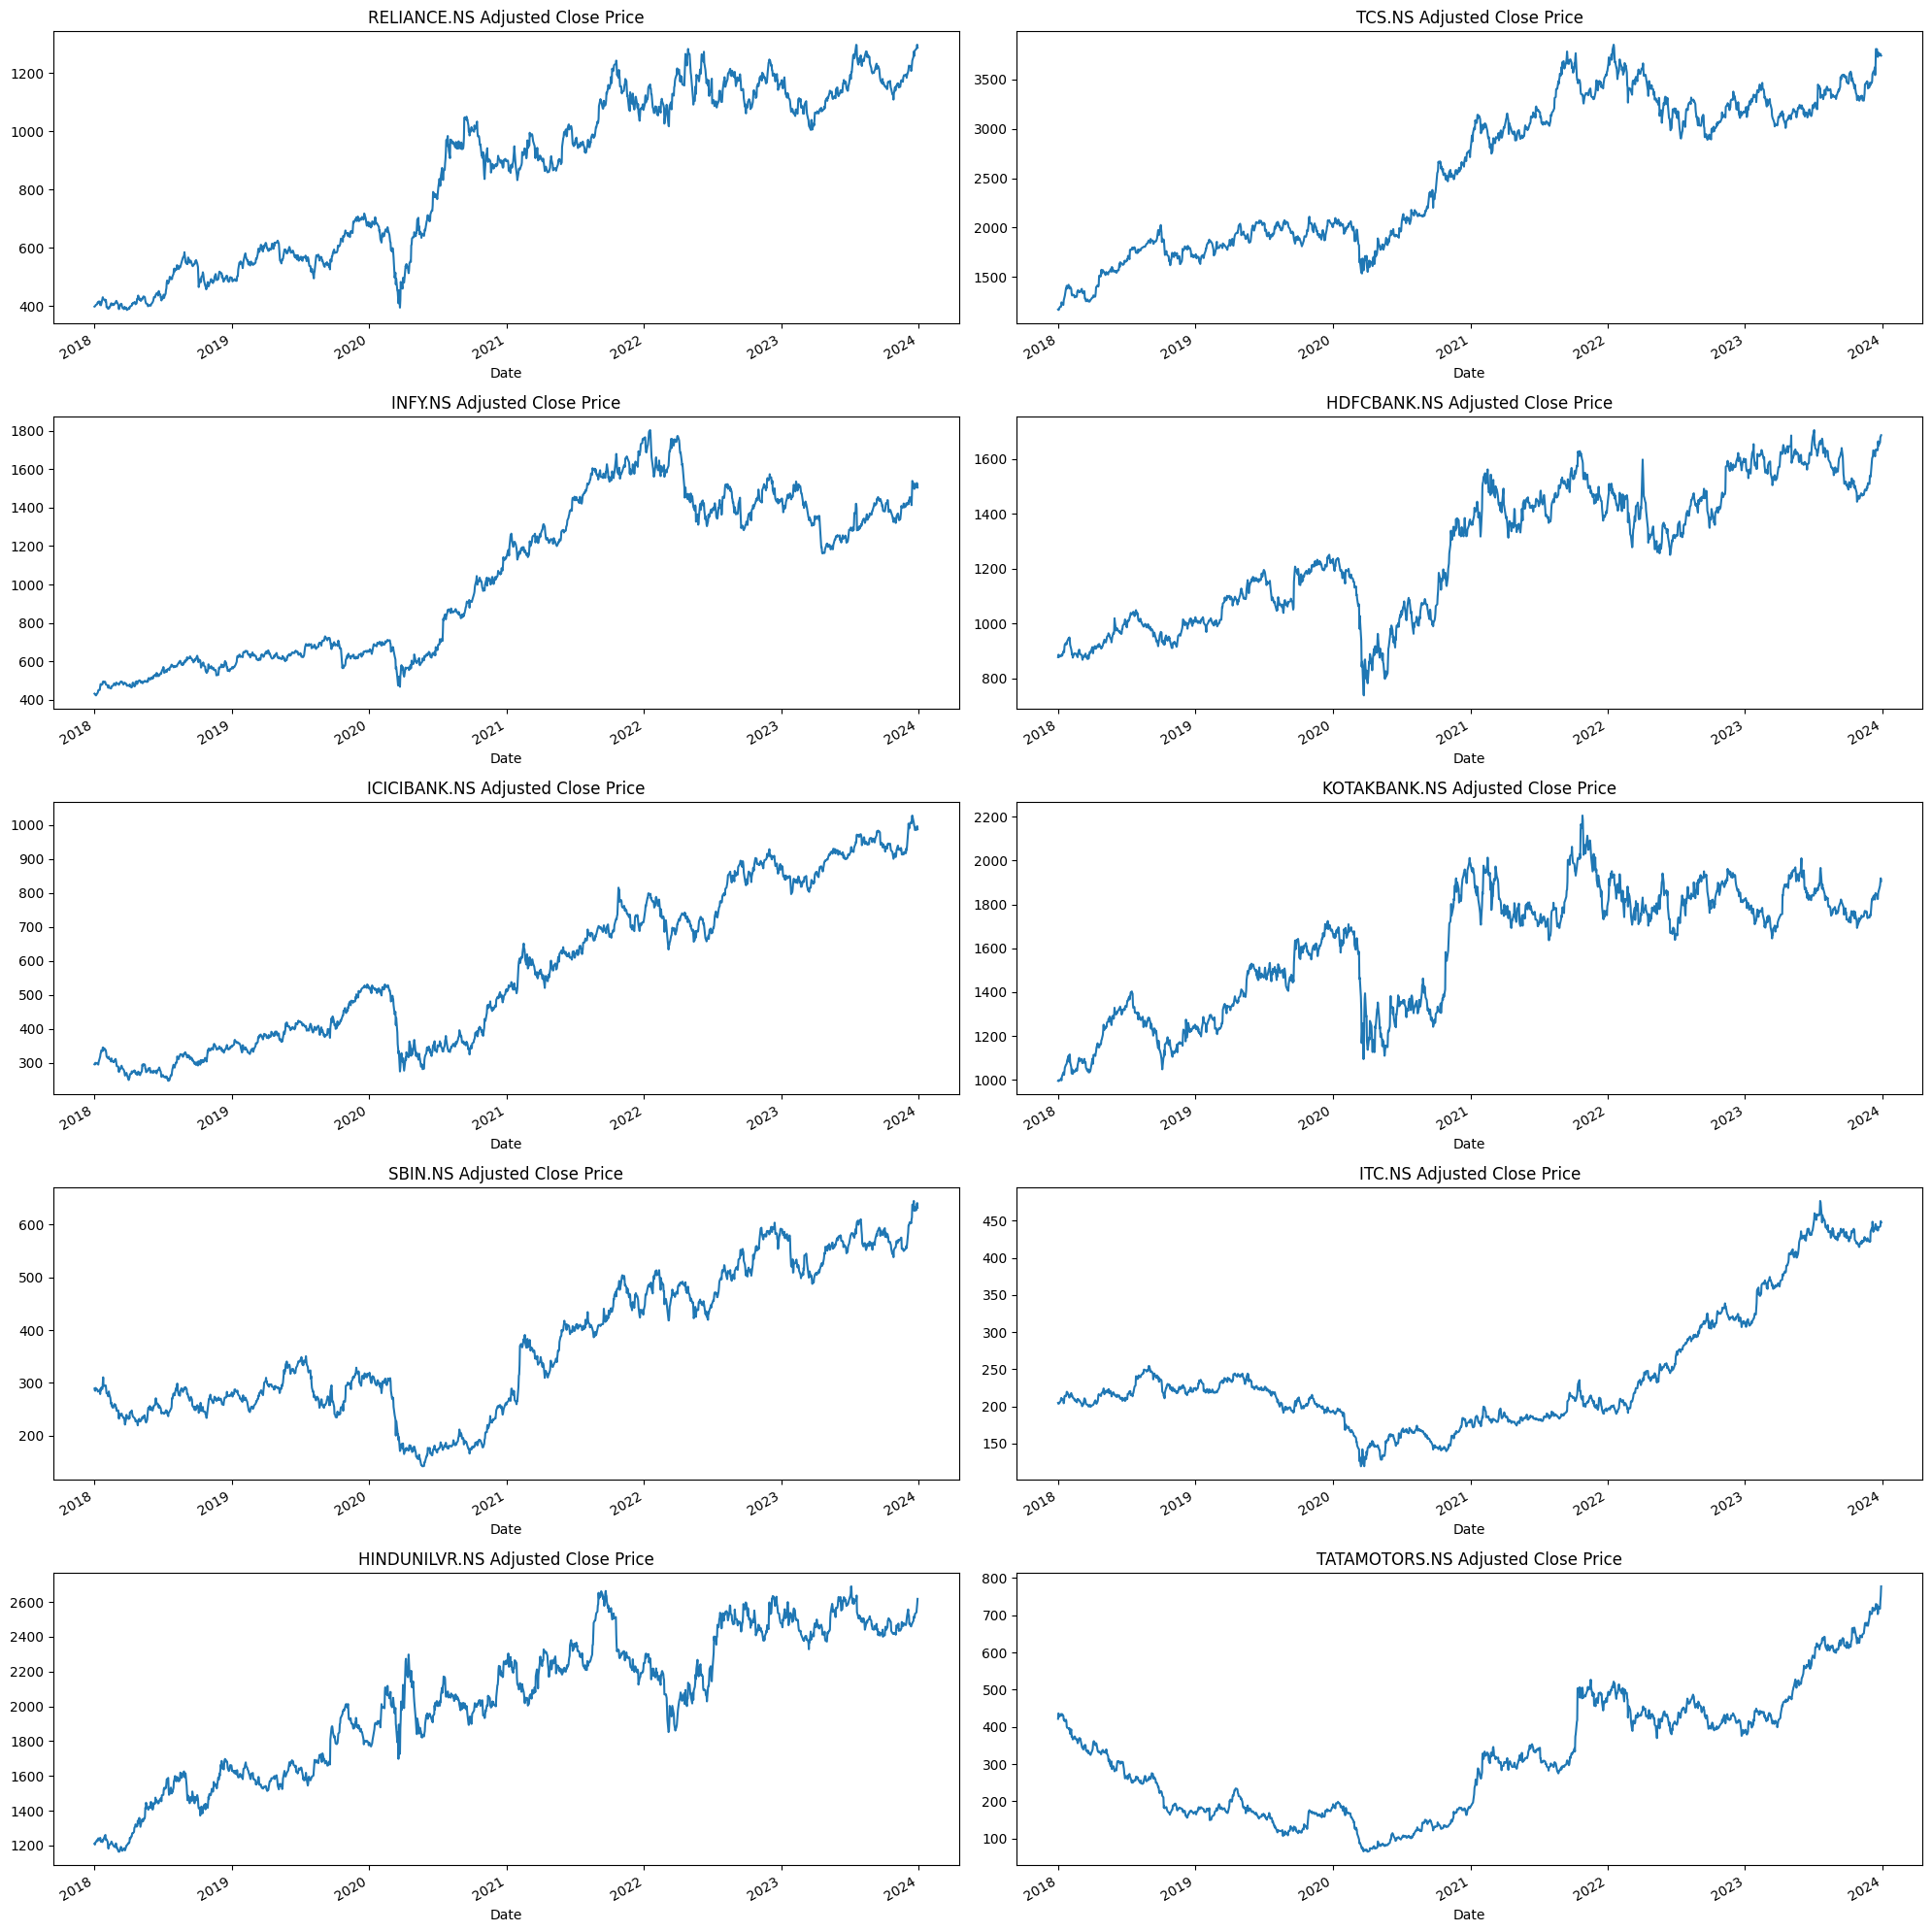

In [29]:
# Function to fetch historical data for a list of stocks
def fetch_data(tickers, start_date, end_date):
    data = {}
    for ticker in tickers:
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        data[ticker] = stock_data
    return data

# Example list of NSE stock tickers
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'SBIN.NS', 'ITC.NS', 'HINDUNILVR.NS', 'TATAMOTORS.NS']

# Fetch data from 2018 to 2023
start_date = "2018-01-01"
end_date = "2023-12-31"
market_data = fetch_data(tickers, start_date, end_date)

# Preprocess data and account for stock splits
for ticker, df in market_data.items():
    df['Adj Close'] = df['Adj Close'].fillna(method='ffill')
    df['Returns'] = df['Adj Close'].pct_change()

# Create subplots of Adjusted Close Prices
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
for i, (ticker, df) in enumerate(market_data.items()):
    df['Adj Close'].plot(ax=axes[i//2, i%2], title=f'{ticker} Adjusted Close Price')
plt.tight_layout()
plt.show()


# Step 2: Strategy Development

- 1. Simple Moving Average (SMA) crossover strategy: In this strategy, traders look for the crossover of two different SMA periods, for example, a 50-day SMA and a 200-day SMA. When the 50-day SMA crosses above the 200-day SMA, it signals a bullish trend and traders may consider buying the stock. Conversely, when the 50-day SMA crosses below the 200-day SMA, it signals a bearish trend and traders may consider selling the stock.

- 2. Exponential Moving Average (EMA) crossover strategy: This strategy is similar to the SMA crossover strategy, but instead of using simple moving averages, traders use exponential moving averages. EMAs give more weight to recent price movements, making them more responsive to changes in trend.

- 3. Moving Average Divergence-Convergence (MACD) strategy: This strategy uses the MACD indicator, which is derived from two exponential moving averages. Traders look for the crossover of the MACD line and the signal line, which is a 9-day EMA of the MACD line. When the MACD line crosses above the signal line, it signals a bullish trend, and when it crosses below the signal line, it signals a bearish trend


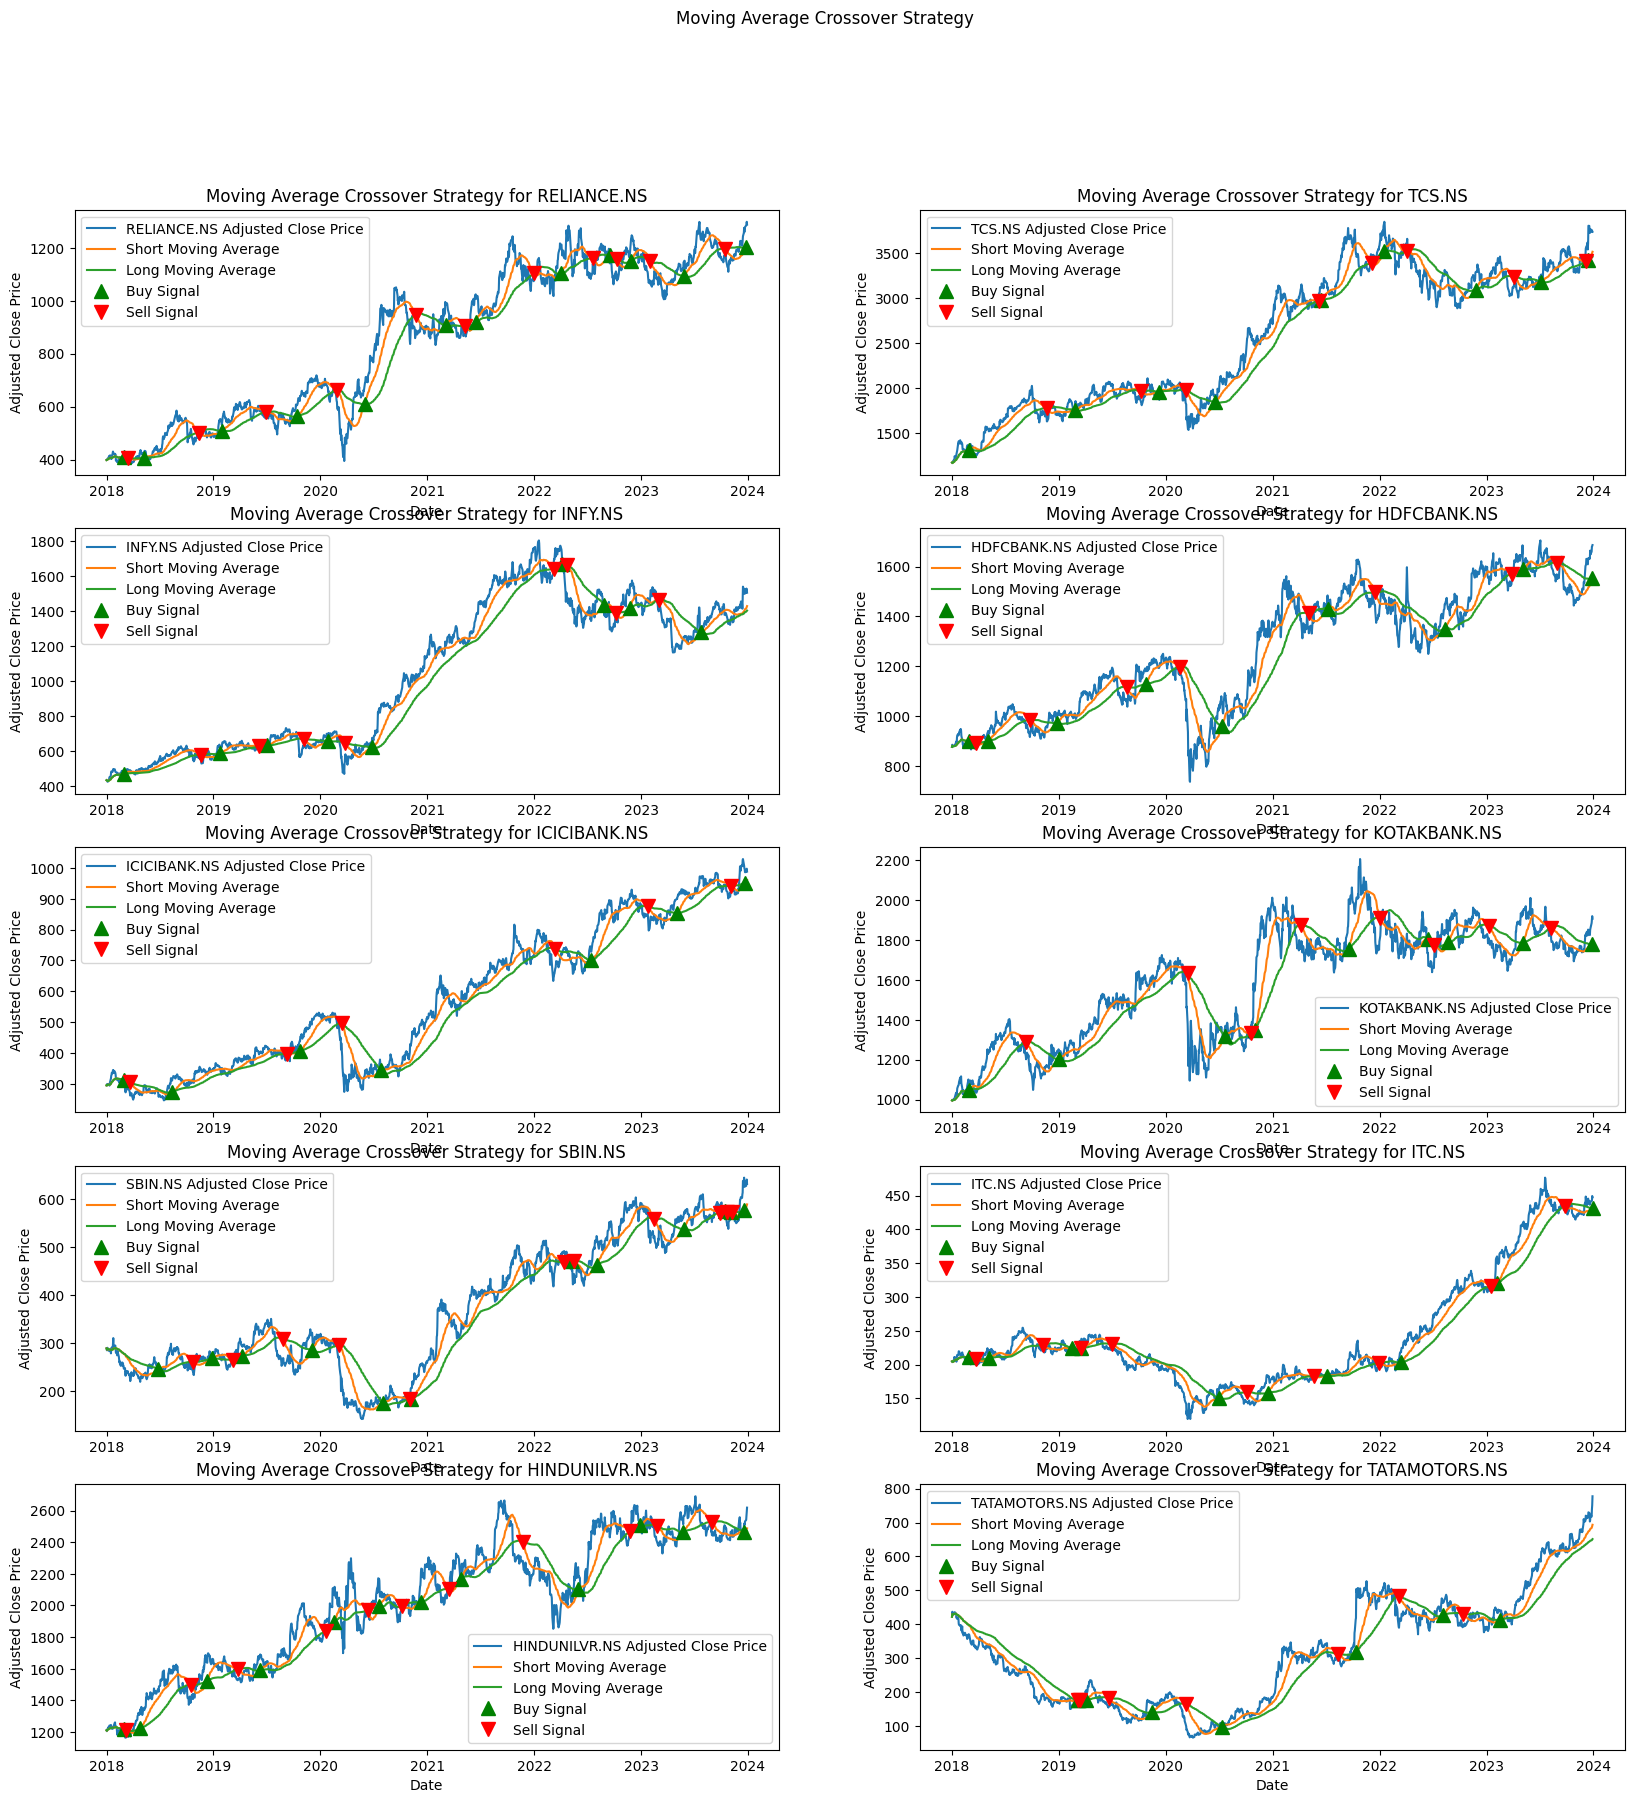

In [30]:
# Moving Average Crossover Strategy
def moving_average_crossover_strategy(data, short_window=40, long_window=100):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0
    signals['short_mavg'] = data['Adj Close'].rolling(window=short_window, min_periods=1).mean()
    signals['long_mavg'] = data['Adj Close'].rolling(window=long_window, min_periods=1).mean()

    signals['signal'][short_window:] = \
        np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)   

    signals['positions'] = signals['signal'].diff()
    return signals

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
for i, (ticker, df) in enumerate(market_data.items()):
    signals = moving_average_crossover_strategy(df)
    axes[i//2, i%2].plot(df['Adj Close'], label=f'{ticker} Adjusted Close Price')
    axes[i//2, i%2].plot(signals['short_mavg'], label='Short Moving Average')
    axes[i//2, i%2].plot(signals['long_mavg'], label='Long Moving Average')
    axes[i//2, i%2].plot(signals.loc[signals.positions == 1.0].index, 
             signals.short_mavg[signals.positions == 1.0], 
             '^', markersize=10, color='g', label='Buy Signal')
    axes[i//2, i%2].plot(signals.loc[signals.positions == -1.0].index, 
             signals.short_mavg[signals.positions == -1.0], 
             'v', markersize=10, color='r', label='Sell Signal')
    axes[i//2, i%2].set_title(f'Moving Average Crossover Strategy for {ticker}')
    axes[i//2, i%2].set_xlabel('Date')
    axes[i//2, i%2].set_ylabel('Adjusted Close Price')
    axes[i//2, i%2].legend()
plt.suptitle('Moving Average Crossover Strategy')
plt.show()

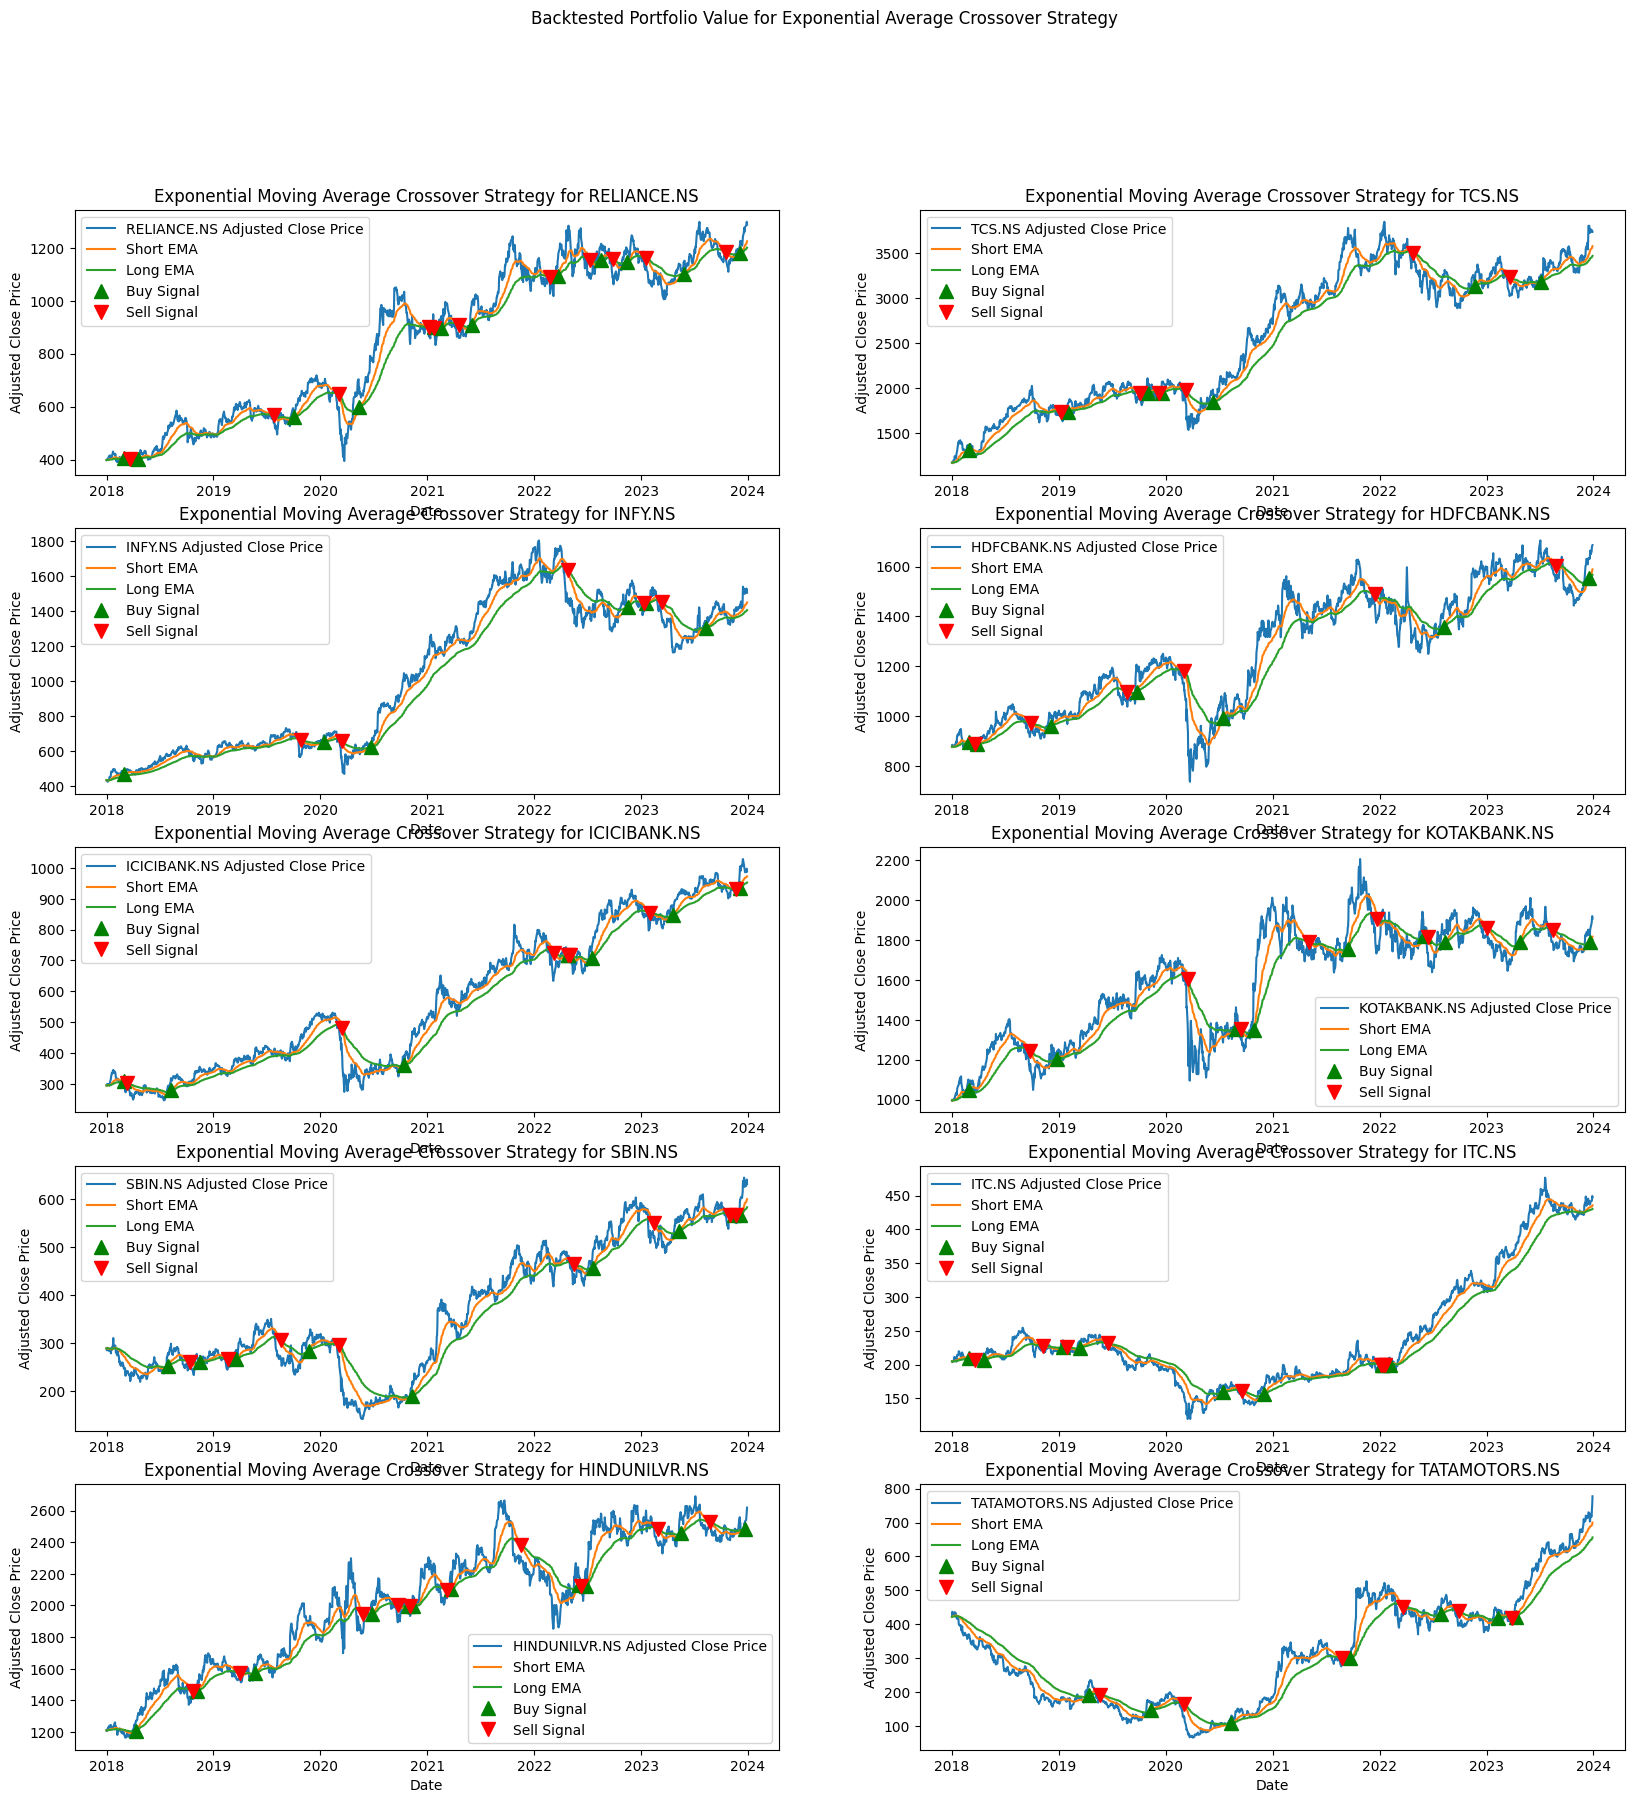

In [31]:
# Exponential Moving Average Crossover Strategy
def ema_crossover_strategy(data, short_window=40, long_window=100):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0
    signals['short_ema'] = data['Adj Close'].ewm(span=short_window, adjust=False).mean()
    signals['long_ema'] = data['Adj Close'].ewm(span=long_window, adjust=False).mean()

    signals['signal'][short_window:] = \
        np.where(signals['short_ema'][short_window:] > signals['long_ema'][short_window:], 1.0, 0.0)   

    signals['positions'] = signals['signal'].diff()
    return signals


fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
for i, (ticker, df) in enumerate(market_data.items()):
    signals = ema_crossover_strategy(df)
    axes[i//2, i%2].plot(df['Adj Close'], label=f'{ticker} Adjusted Close Price')
    axes[i//2, i%2].plot(signals['short_ema'], label='Short EMA')
    axes[i//2, i%2].plot(signals['long_ema'], label='Long EMA')
    axes[i//2, i%2].plot(signals.loc[signals.positions == 1.0].index, 
             signals.short_ema[signals.positions == 1.0], 
             '^', markersize=10, color='g', label='Buy Signal')
    axes[i//2, i%2].plot(signals.loc[signals.positions == -1.0].index, 
             signals.short_ema[signals.positions == -1.0], 
             'v', markersize=10, color='r', label='Sell Signal')
    axes[i//2, i%2].set_title(f'Exponential Moving Average Crossover Strategy for {ticker}')
    axes[i//2, i%2].set_xlabel('Date')
    axes[i//2, i%2].set_ylabel('Adjusted Close Price')
    axes[i//2, i%2].legend()
plt.suptitle('Backtested Portfolio Value for Exponential Average Crossover Strategy')
plt.show()



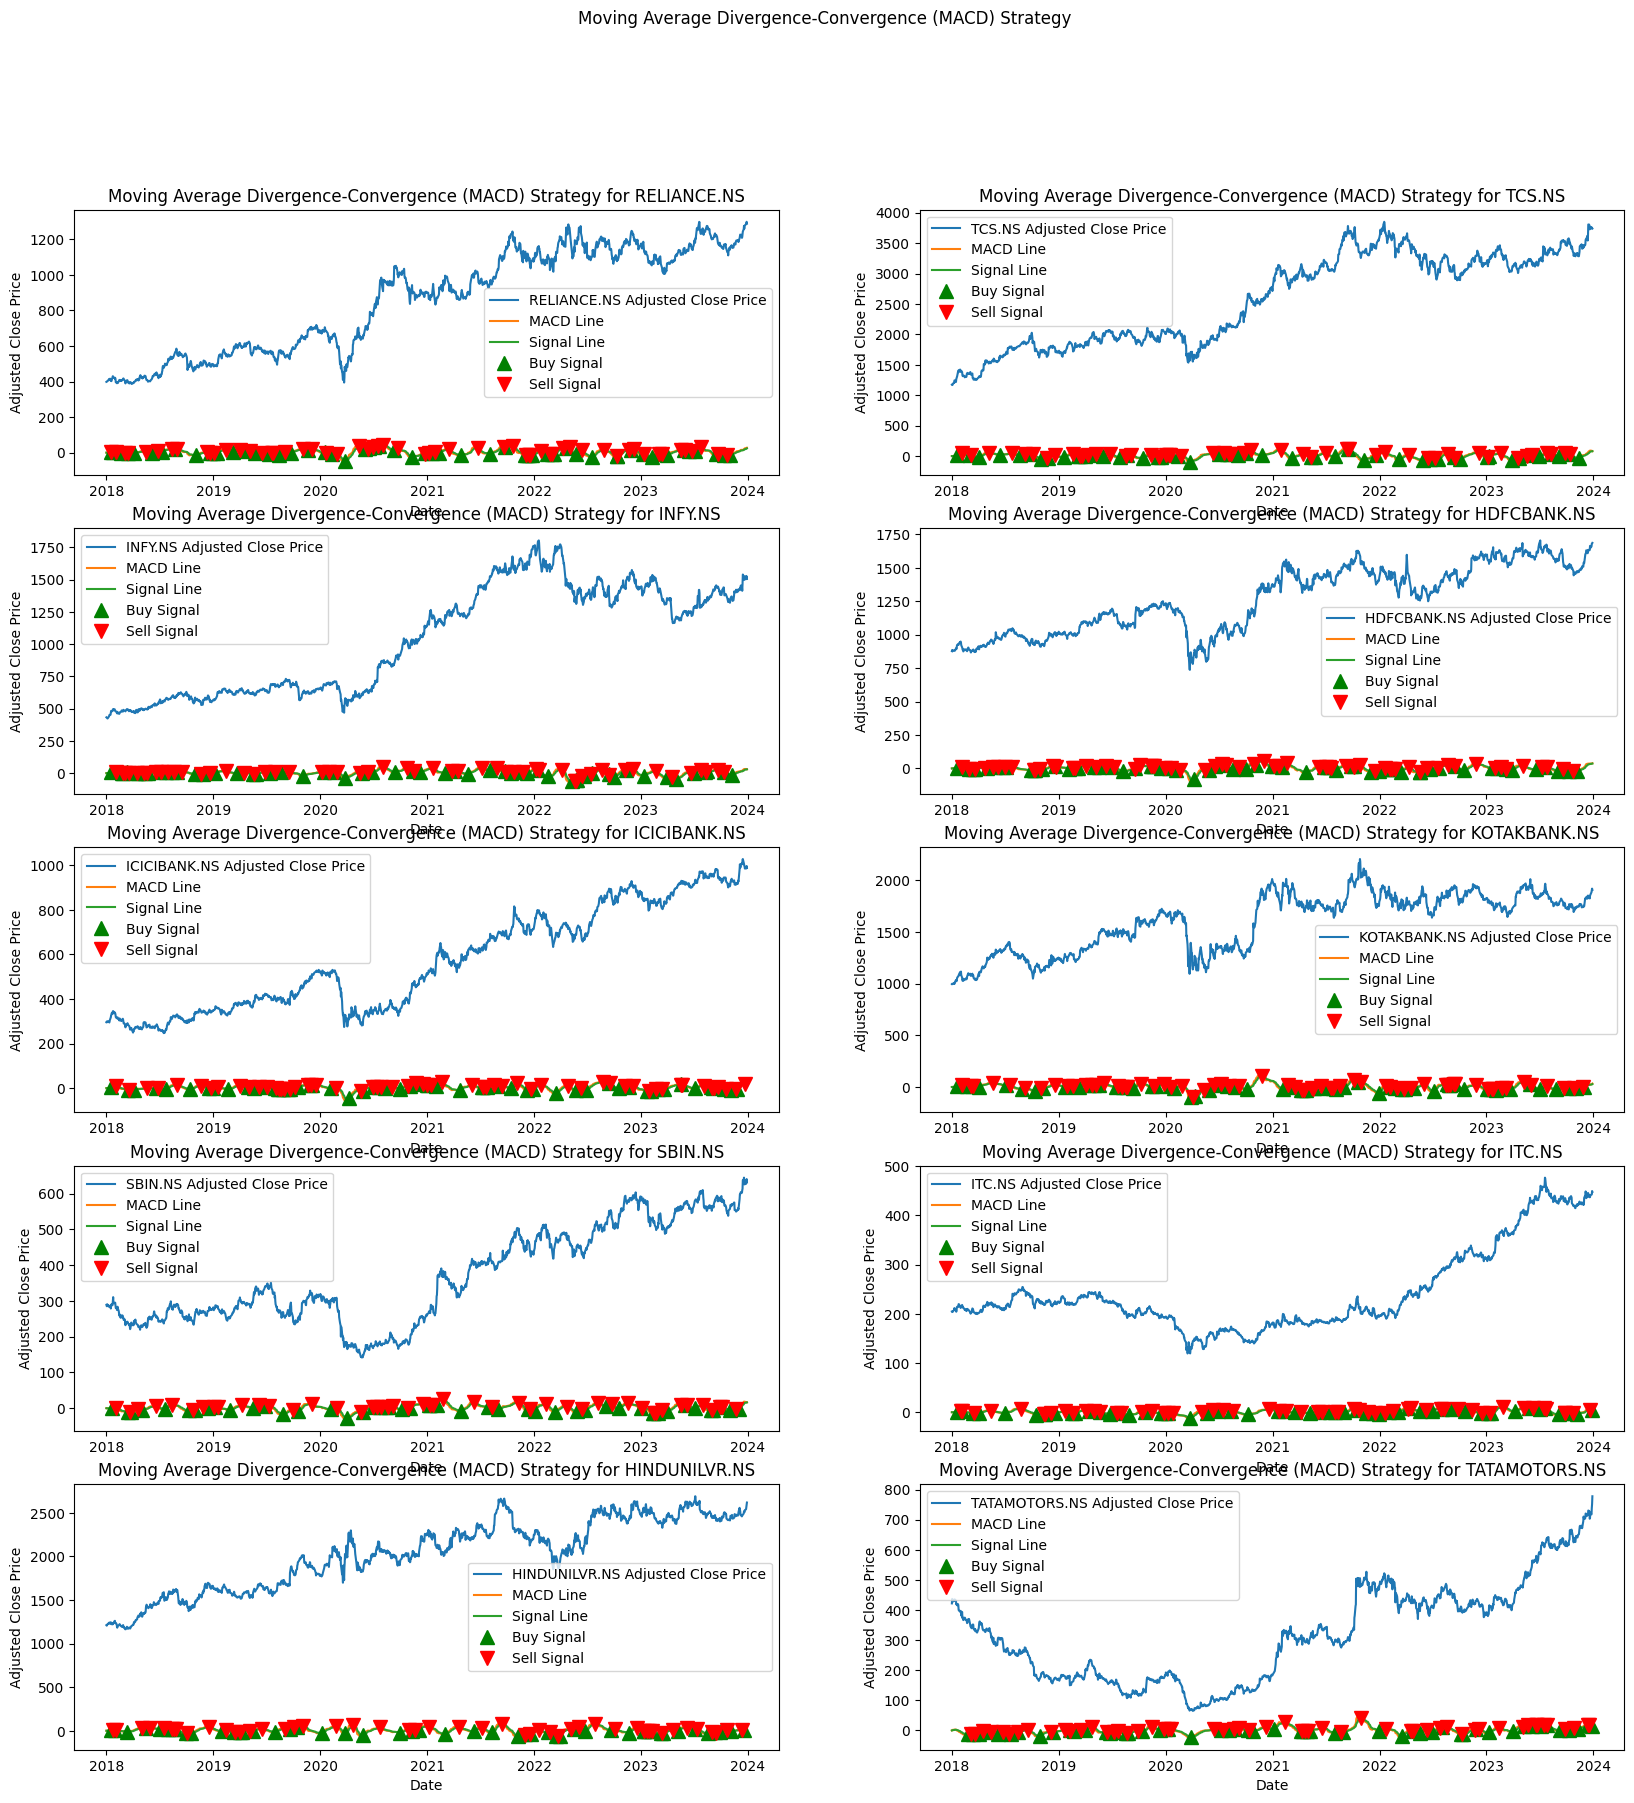

In [32]:
# Moving Average Divergence-Convergence (MACD) Strategy
def macd_strategy(data, short_window=12, long_window=26, signal_window=9):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0
    signals['short_ema'] = data['Adj Close'].ewm(span=short_window, adjust=False).mean()
    signals['long_ema'] = data['Adj Close'].ewm(span=long_window, adjust=False).mean()
    signals['macd'] = signals['short_ema'] - signals['long_ema']
    signals['signal_line'] = signals['macd'].ewm(span=signal_window, adjust=False).mean()

    signals['signal'][short_window:] = \
        np.where(signals['macd'][short_window:] > signals['signal_line'][short_window:], 1.0, 0.0)   

    signals['positions'] = signals['signal'].diff()
    return signals

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
for i, (ticker, df) in enumerate(market_data.items()):
    signals = macd_strategy(df)
    axes[i//2, i%2].plot(df['Adj Close'], label=f'{ticker} Adjusted Close Price')
    axes[i//2, i%2].plot(signals['macd'], label='MACD Line')
    axes[i//2, i%2].plot(signals['signal_line'], label='Signal Line')
    axes[i//2, i%2].plot(signals.loc[signals.positions == 1.0].index, 
             signals.macd[signals.positions == 1.0], 
             '^', markersize=10, color='g', label='Buy Signal')
    axes[i//2, i%2].plot(signals.loc[signals.positions == -1.0].index, 
             signals.macd[signals.positions == -1.0], 
             'v', markersize=10, color='r', label='Sell Signal')
    axes[i//2, i%2].set_title(f'Moving Average Divergence-Convergence (MACD) Strategy for {ticker}')
    axes[i//2, i%2].set_xlabel('Date')
    axes[i//2, i%2].set_ylabel('Adjusted Close Price')
    axes[i//2, i%2].legend()
plt.suptitle('Moving Average Divergence-Convergence (MACD) Strategy')
plt.show()


# Step 3: Backtesting Framework


In [33]:
def backtest_strategy(df, signals, initial_capital=1000000.0):

    portfolio = pd.DataFrame(index=df.index)
    portfolio['signal'] = signals['signal']
    portfolio['price'] = df['Adj Close']
    portfolio['positions'] = portfolio['signal'].diff()
    portfolio['holdings'] = portfolio['signal'] * portfolio['price']
    portfolio['cash'] = initial_capital - (portfolio['positions'] * portfolio['price']).cumsum()
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']
    portfolio['returns'] = portfolio['total'].pct_change()
    
    return portfolio


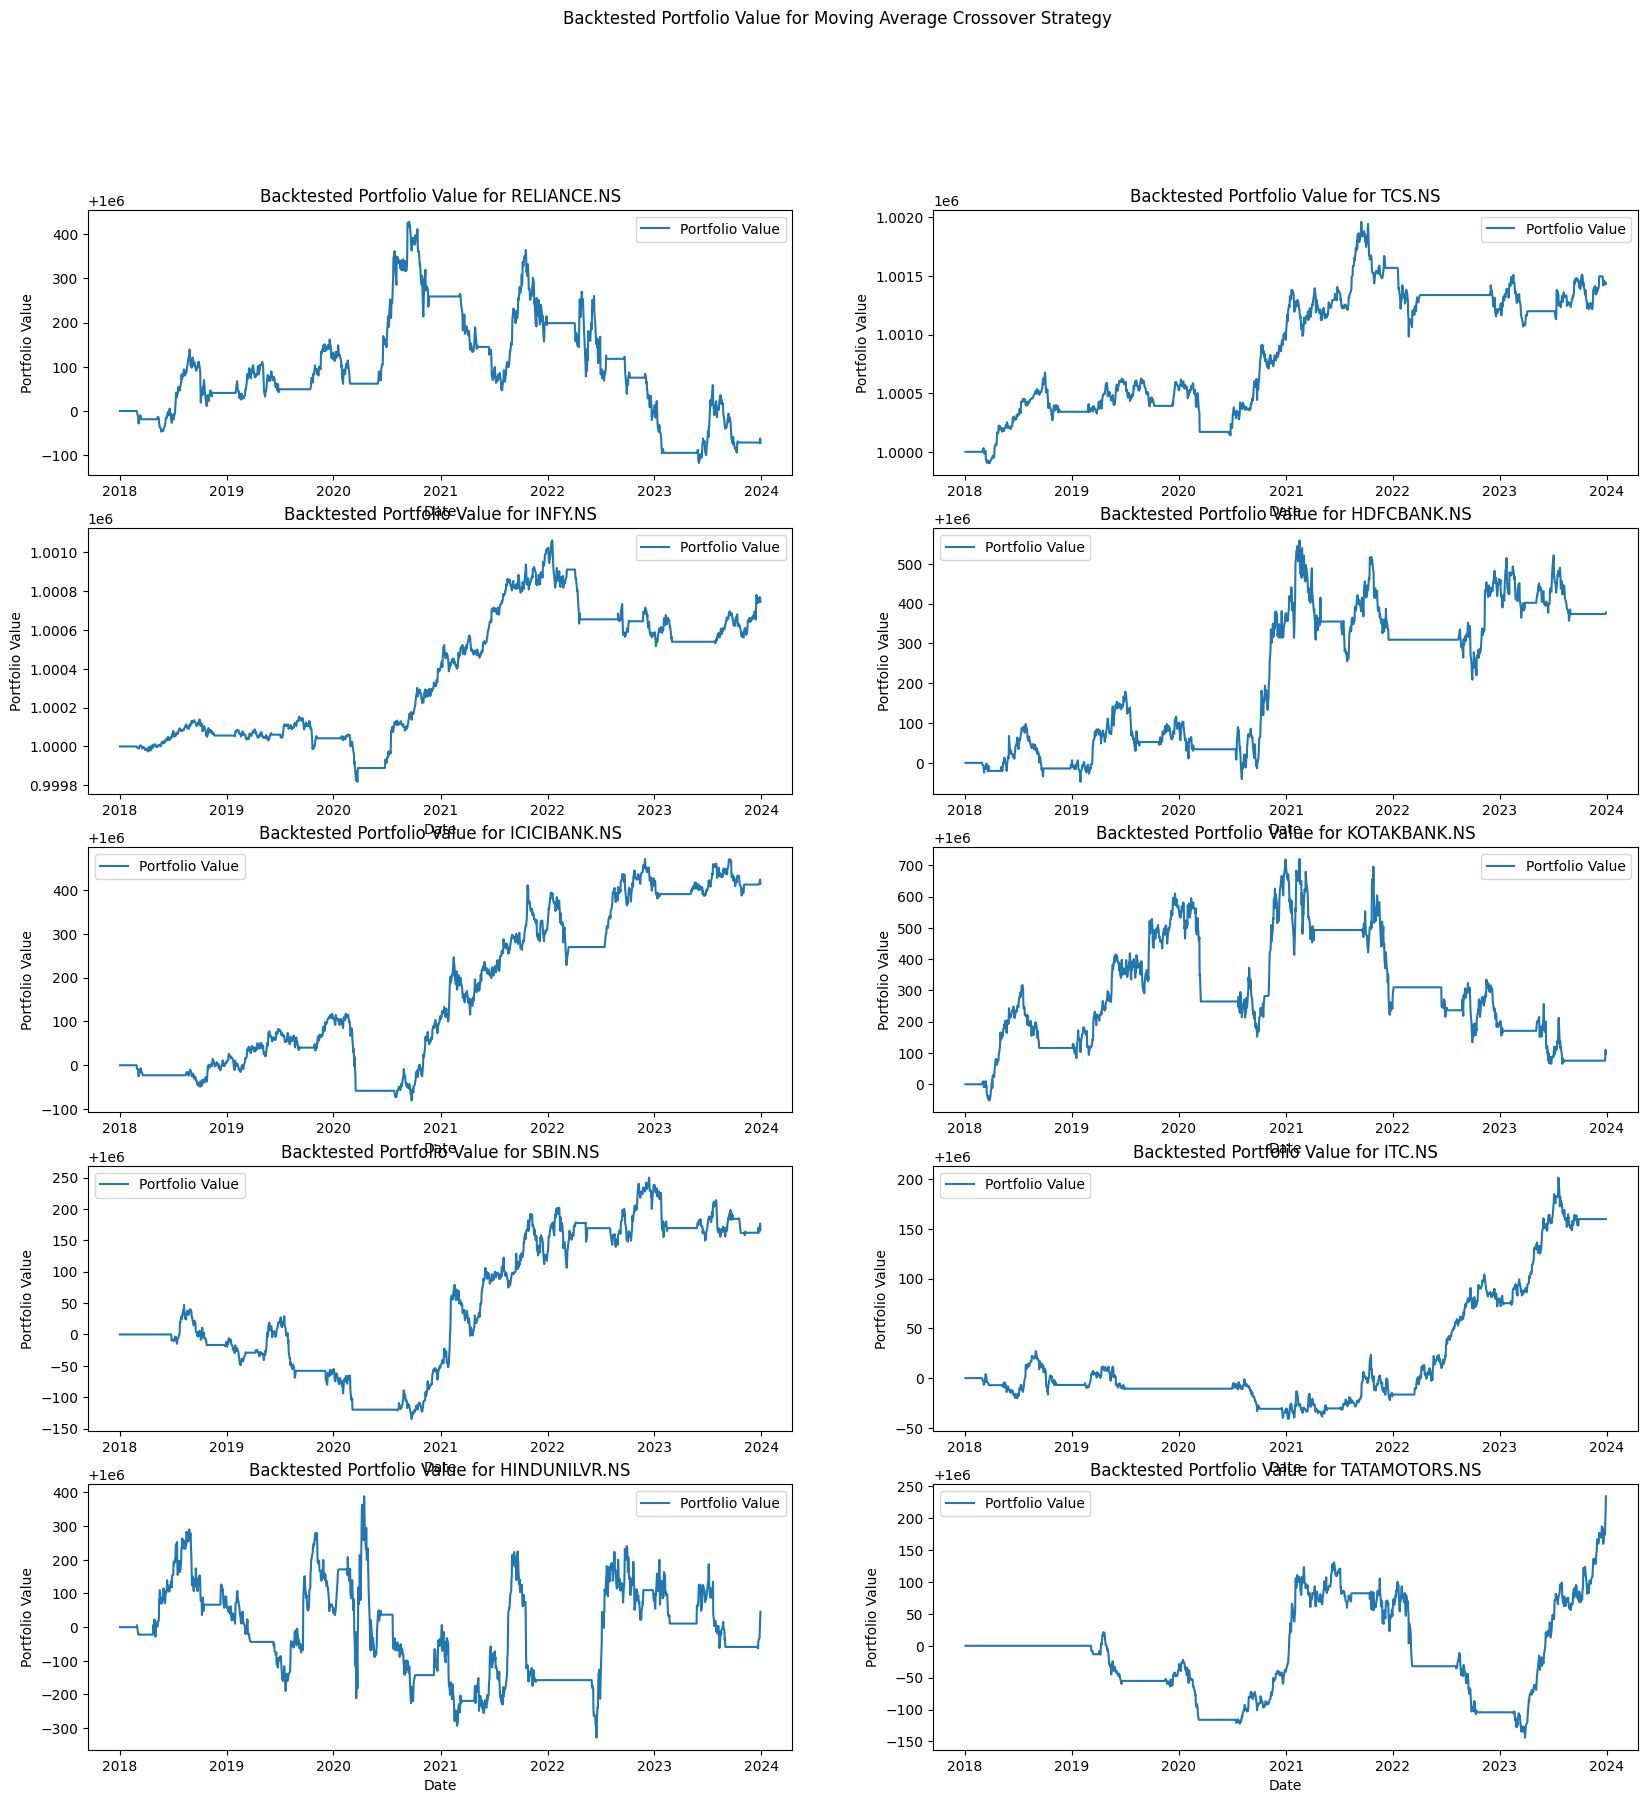

In [34]:
# Backtest Moving Average Crossover Strategy
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
for i, (ticker, df) in enumerate(market_data.items()):
    signals = moving_average_crossover_strategy(df)
    portfolio = backtest_strategy(df, signals)
    axes[i//2, i%2].plot(portfolio['total'], label='Portfolio Value')
    axes[i//2, i%2].set_title(f'Backtested Portfolio Value for {ticker}')
    axes[i//2, i%2].set_xlabel('Date')
    axes[i//2, i%2].set_ylabel('Portfolio Value')
    axes[i//2, i%2].legend()
plt.suptitle('Backtested Portfolio Value for Moving Average Crossover Strategy')
plt.show()


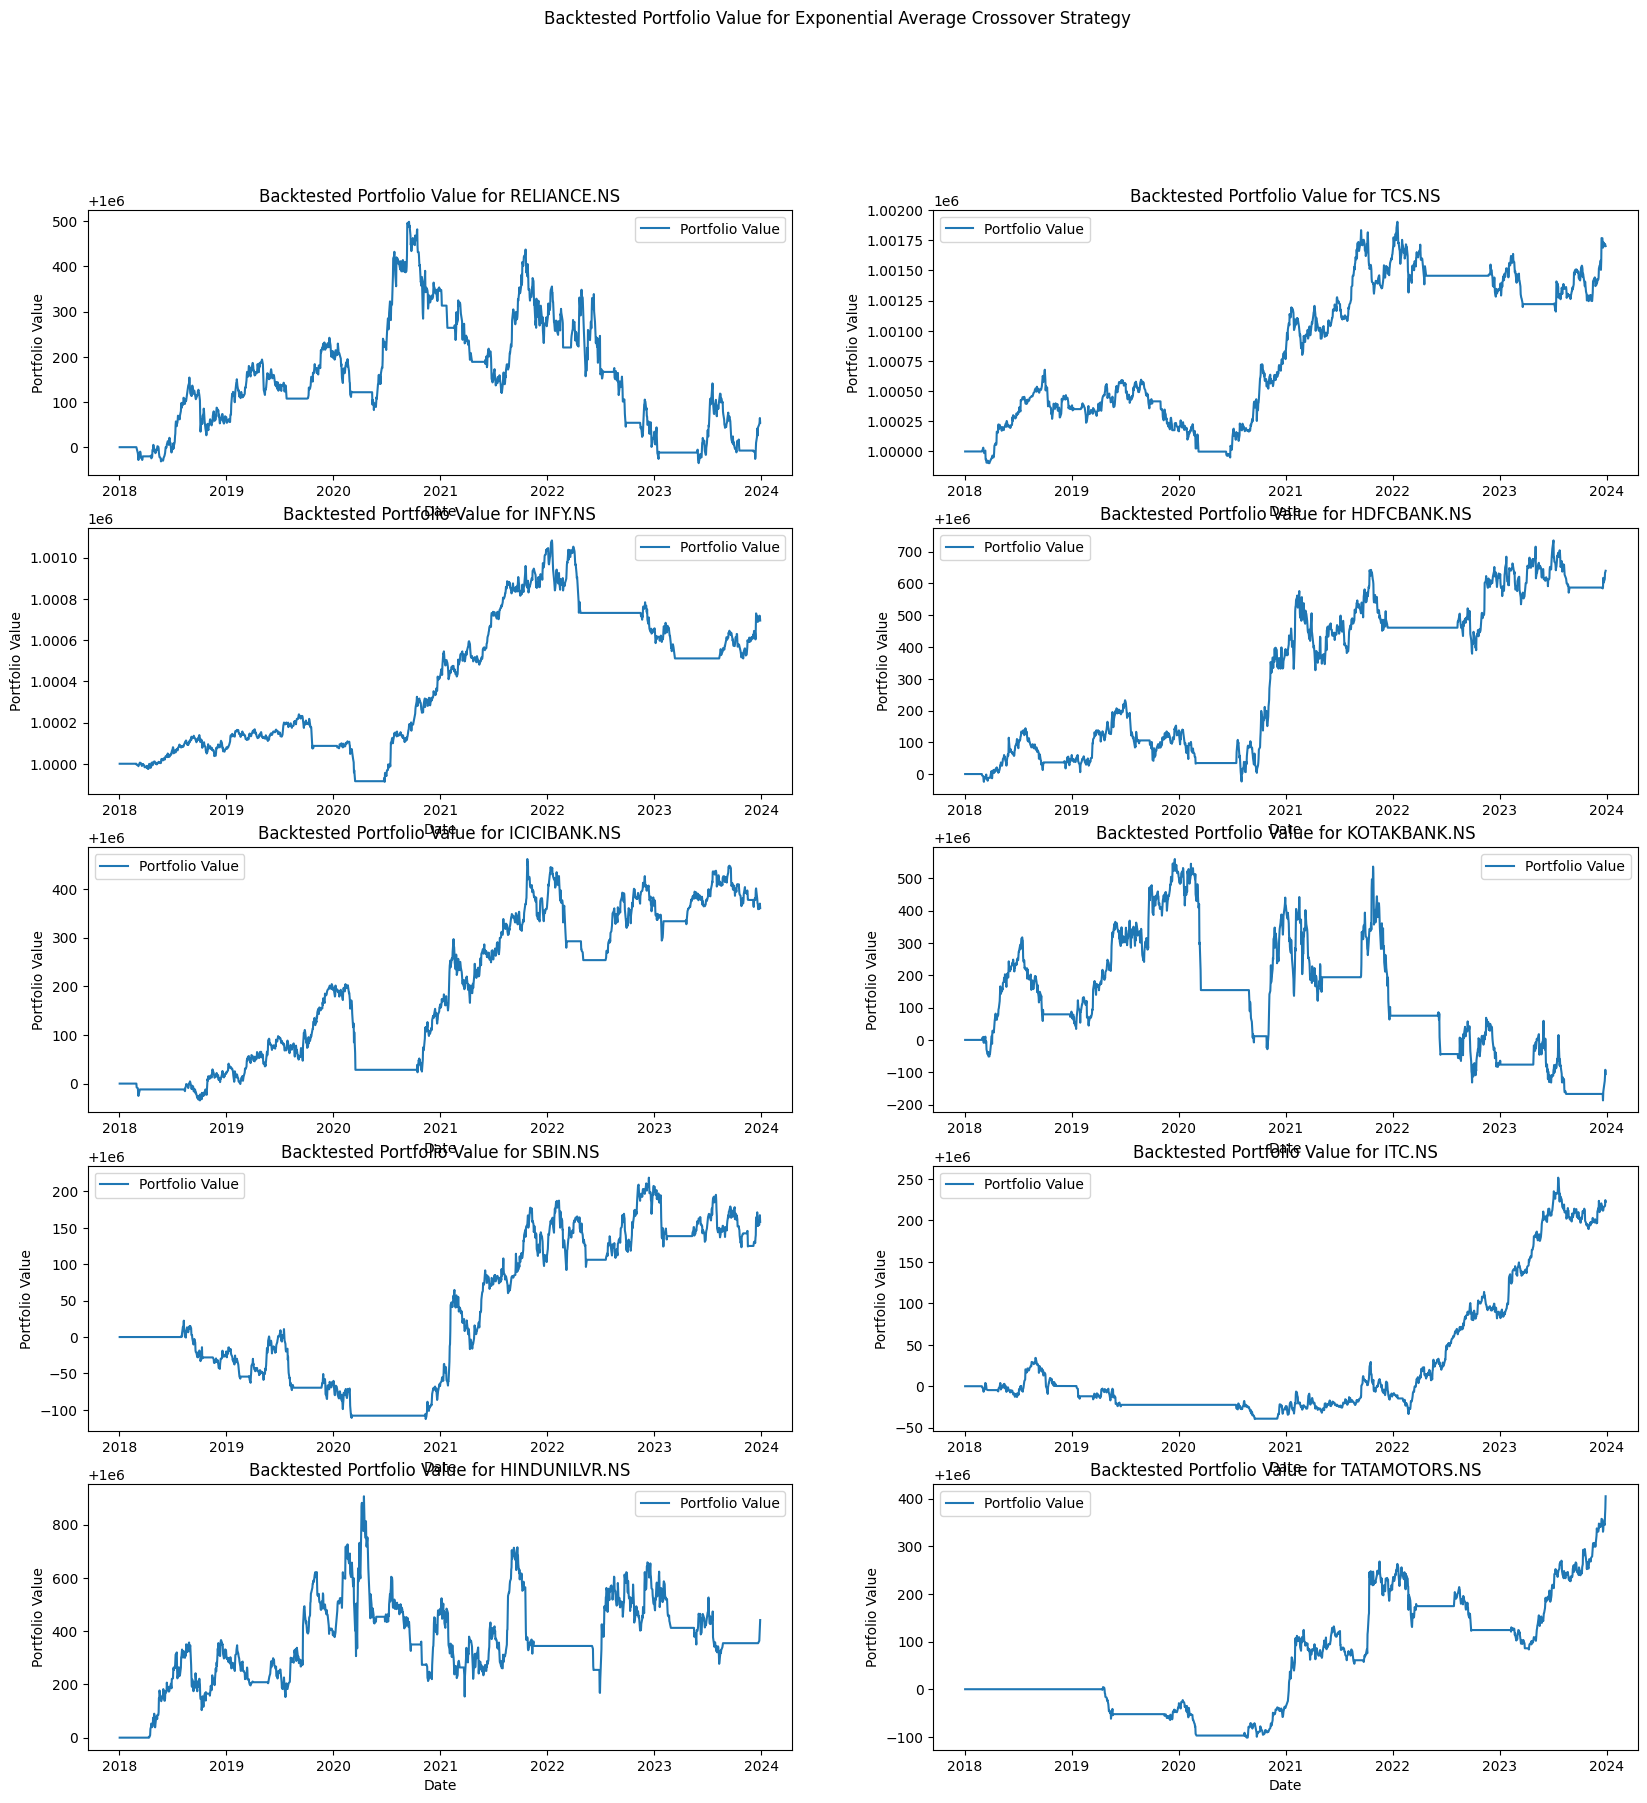

In [35]:
# Backtest Exponential Moving Average Crossover Strategy
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
for i, (ticker, df) in enumerate(market_data.items()):
    signals = ema_crossover_strategy(df)
    portfolio = backtest_strategy(df, signals)
    axes[i//2, i%2].plot(portfolio['total'], label='Portfolio Value')
    axes[i//2, i%2].set_title(f'Backtested Portfolio Value for {ticker}')
    axes[i//2, i%2].set_xlabel('Date')
    axes[i//2, i%2].set_ylabel('Portfolio Value')
    axes[i//2, i%2].legend()
plt.suptitle('Backtested Portfolio Value for Exponential Average Crossover Strategy')
plt.show()



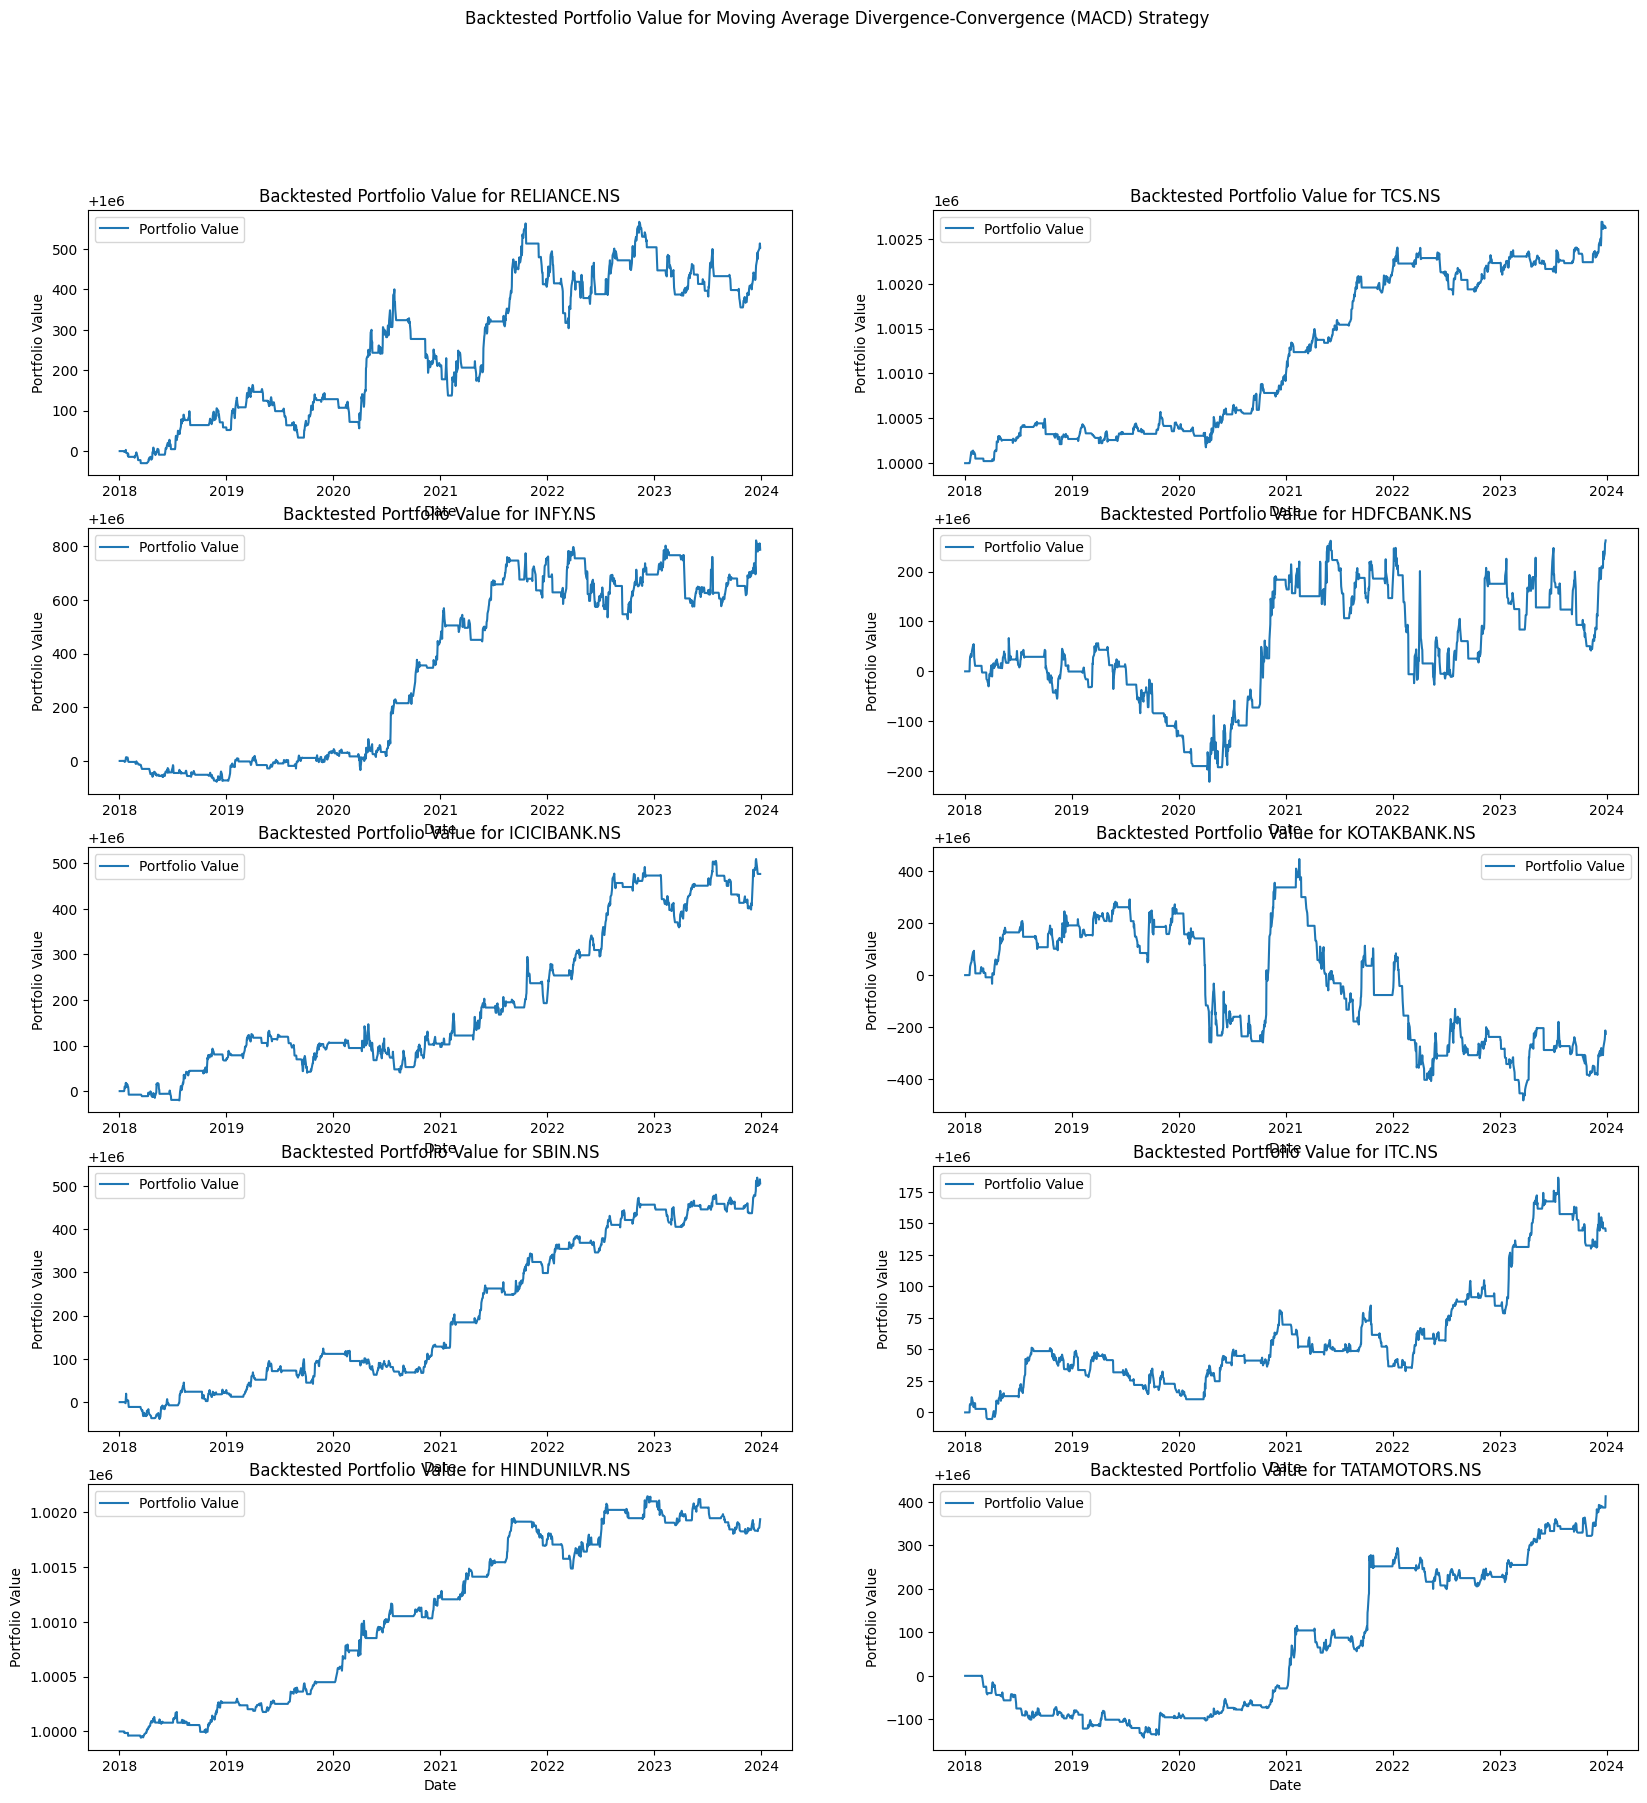

In [36]:
# Backtest Moving Average Divergence-Convergence (MACD) Strategy
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
for i, (ticker, df) in enumerate(market_data.items()):
    signals = macd_strategy(df)
    portfolio = backtest_strategy(df, signals)
    axes[i//2, i%2].plot(portfolio['total'], label='Portfolio Value')
    axes[i//2, i%2].set_title(f'Backtested Portfolio Value for {ticker}')
    axes[i//2, i%2].set_xlabel('Date')
    axes[i//2, i%2].set_ylabel('Portfolio Value')
    axes[i//2, i%2].legend()
plt.suptitle('Backtested Portfolio Value for Moving Average Divergence-Convergence (MACD) Strategy')
plt.show()

# Step 4: Risk Management by Implementing Stop-Loss


In [37]:
# Stop-Loss Implementation
def apply_stop_loss(portfolio, stop_loss_pct):
    portfolio['stop_loss'] = portfolio['total'] * (1 - stop_loss_pct)
    portfolio['stop_loss_signal'] = portfolio['total'] < portfolio['stop_loss']
    return portfolio



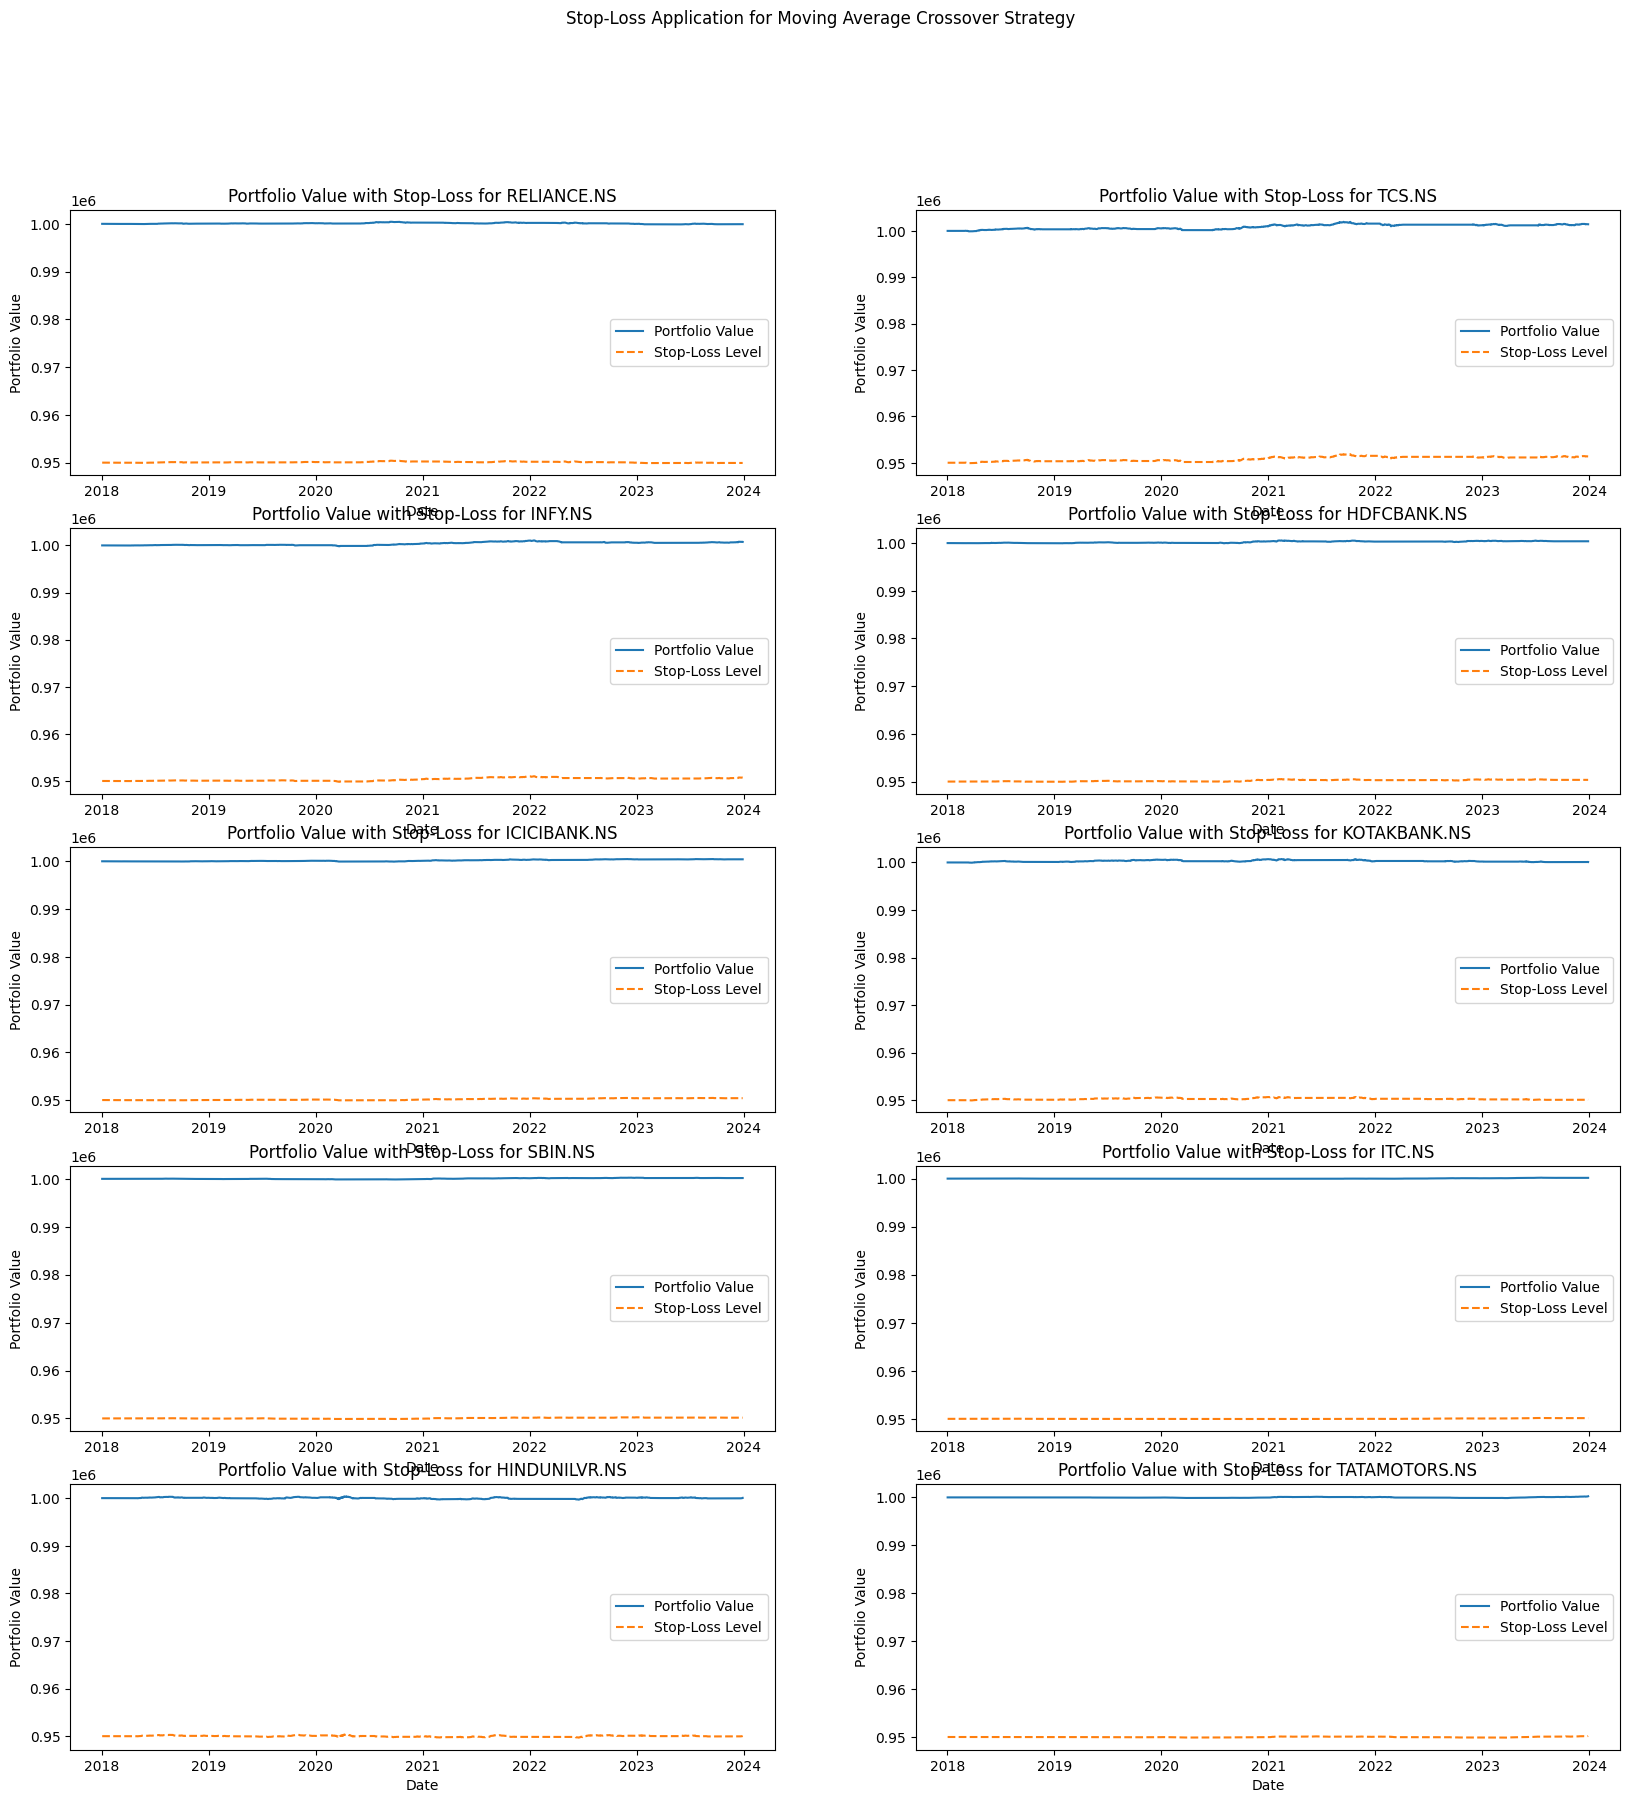

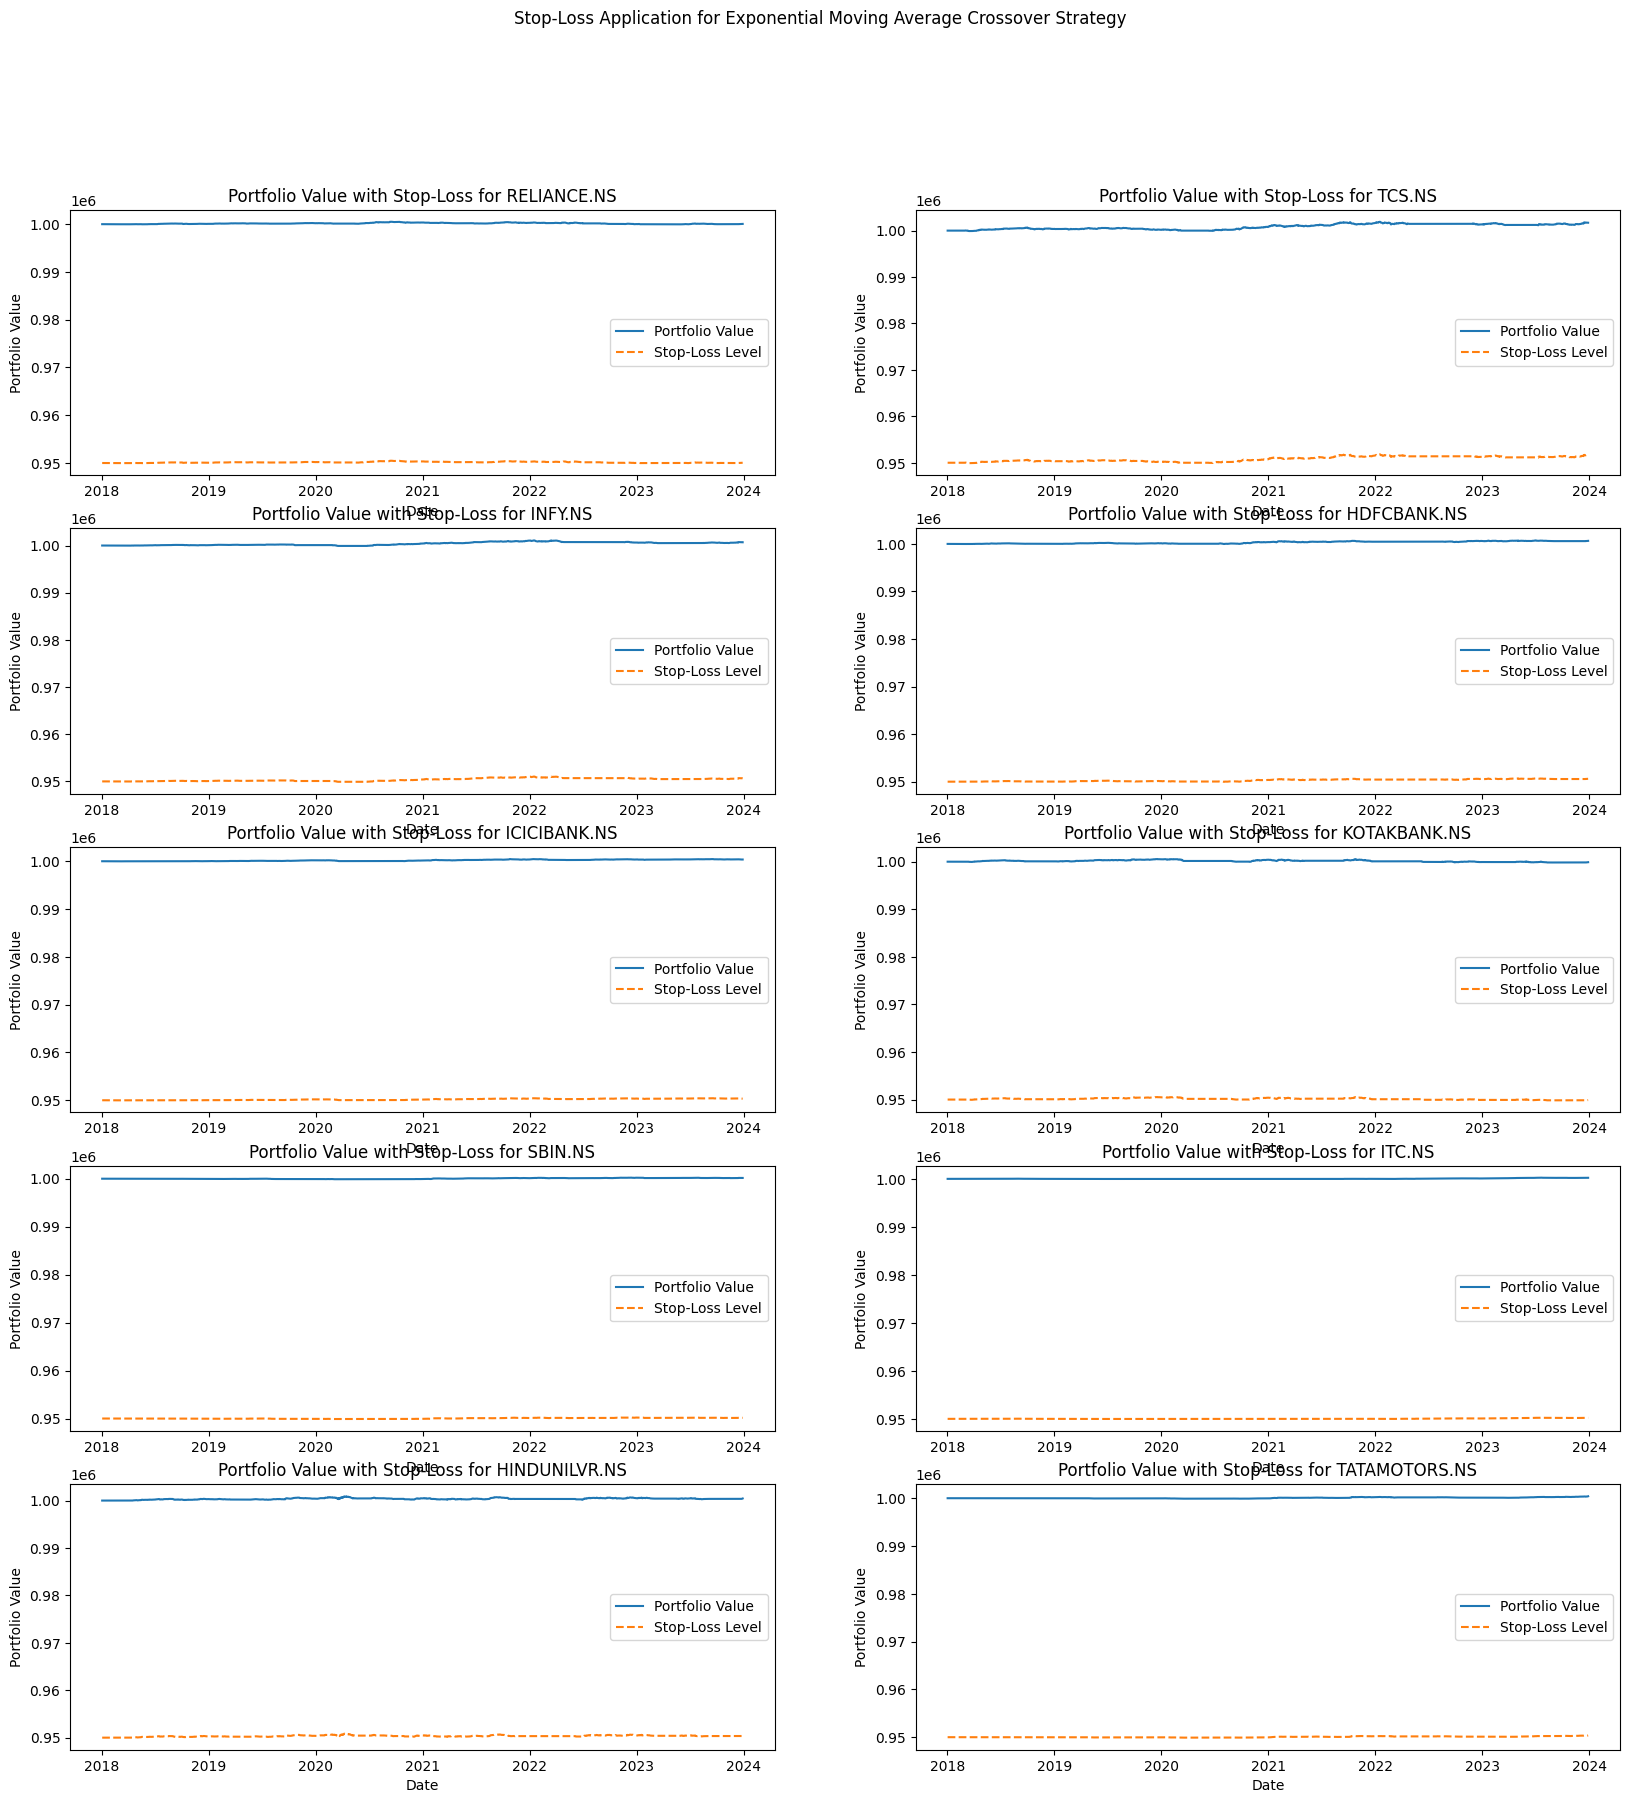

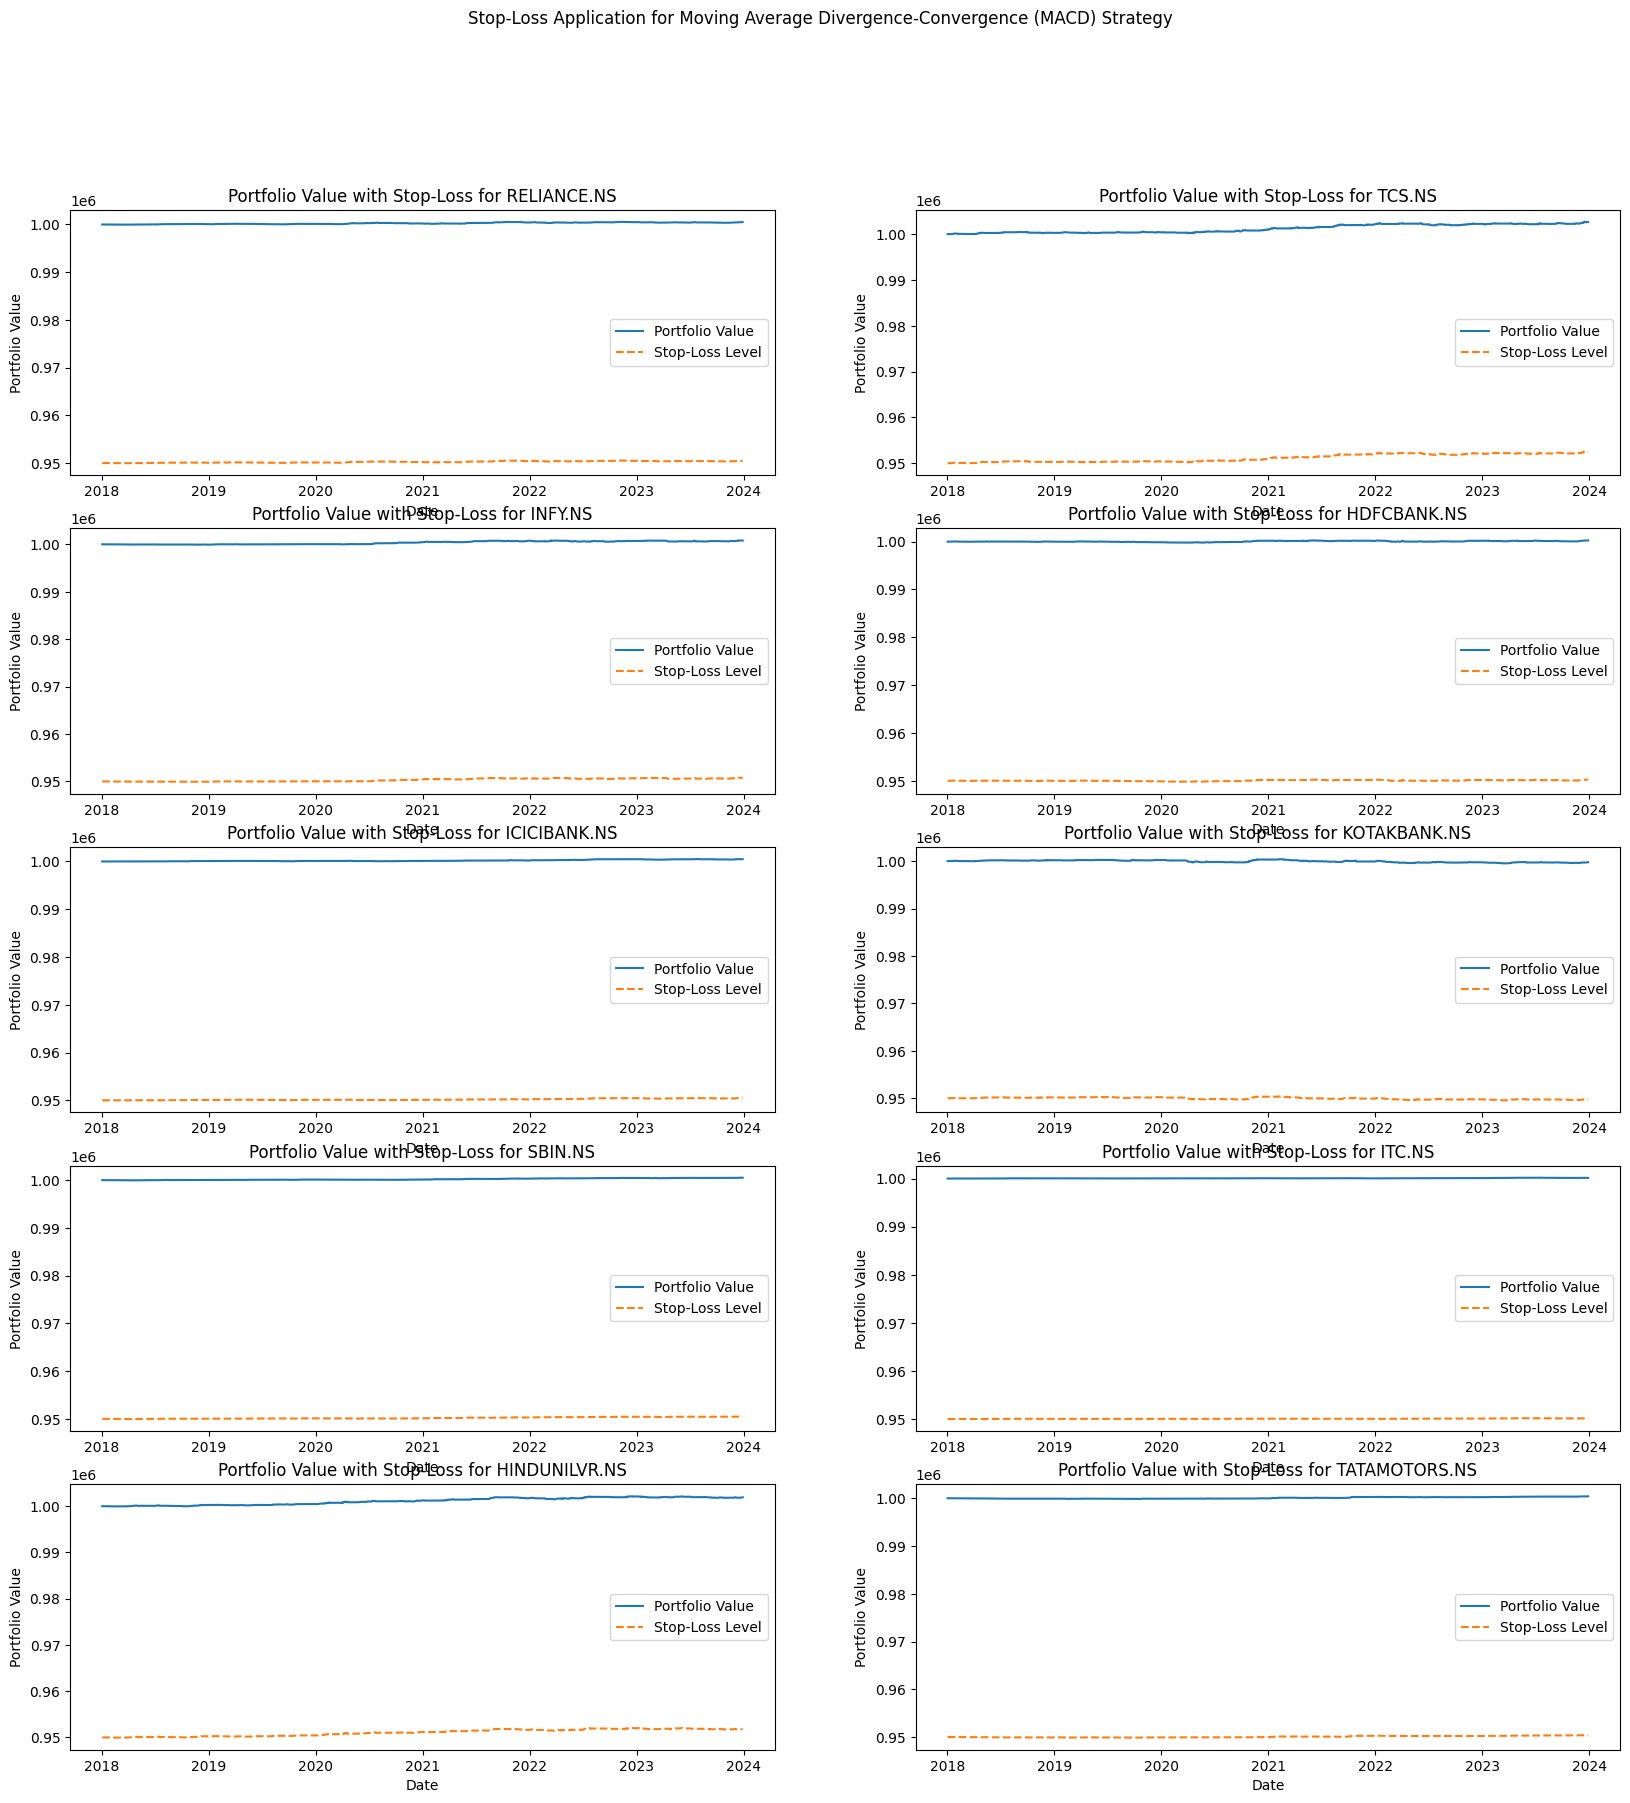

In [53]:
# Stop-loss application for Moving Average Crossover Strategy
stop_loss_pct = 0.05  # 5% stop-loss
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
for i, (ticker, df) in enumerate(market_data.items()):
    signals = moving_average_crossover_strategy(df)
    portfolio = backtest_strategy(df, signals)
    portfolio = apply_stop_loss(portfolio, stop_loss_pct)
    axes[i//2, i%2].plot(portfolio['total'], label='Portfolio Value')
    axes[i//2, i%2].plot(portfolio['stop_loss'], label='Stop-Loss Level', linestyle='--')
    axes[i//2, i%2].set_title(f'Portfolio Value with Stop-Loss for {ticker}')
    axes[i//2, i%2].set_xlabel('Date')
    axes[i//2, i%2].set_ylabel('Portfolio Value')
    axes[i//2, i%2].legend()
plt.suptitle('Stop-Loss Application for Moving Average Crossover Strategy')
plt.show()

# Stop-loss application for Exponential Moving Average Crossover Strategy
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
for i, (ticker, df) in enumerate(market_data.items()):
    signals = ema_crossover_strategy(df)
    portfolio = backtest_strategy(df, signals)
    portfolio = apply_stop_loss(portfolio, stop_loss_pct)
    axes[i//2, i%2].plot(portfolio['total'], label='Portfolio Value')
    axes[i//2, i%2].plot(portfolio['stop_loss'], label='Stop-Loss Level', linestyle='--')
    axes[i//2, i%2].set_title(f'Portfolio Value with Stop-Loss for {ticker}')
    axes[i//2, i%2].set_xlabel('Date')
    axes[i//2, i%2].set_ylabel('Portfolio Value')
    axes[i//2, i%2].legend()
plt.suptitle('Stop-Loss Application for Exponential Moving Average Crossover Strategy')
plt.show()

# Stop-loss application for Moving Average Divergence-Convergence (MACD) Strategy
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
for i, (ticker, df) in enumerate(market_data.items()):
    signals = macd_strategy(df)
    portfolio = backtest_strategy(df, signals)
    portfolio = apply_stop_loss(portfolio, stop_loss_pct)
    axes[i//2, i%2].plot(portfolio['total'], label='Portfolio Value')
    axes[i//2, i%2].plot(portfolio['stop_loss'], label='Stop-Loss Level', linestyle='--')
    axes[i//2, i%2].set_title(f'Portfolio Value with Stop-Loss for {ticker}')
    axes[i//2, i%2].set_xlabel('Date')
    axes[i//2, i%2].set_ylabel('Portfolio Value')
    axes[i//2, i%2].legend()
plt.suptitle('Stop-Loss Application for Moving Average Divergence-Convergence (MACD) Strategy')
plt.show()

# Step 5: Evaluation and Refinement

In [39]:
def evaluate_strategy(portfolio):
    start = portfolio['total'][1]
    end = portfolio['total'][-1]
    absolute_return_ratio = end / start
    total_return = absolute_return_ratio - 1
    annualized_return = (1 + total_return) ** (252.0 / len(portfolio.index)) - 1
    annualized_volatility = portfolio['returns'].std() * np.sqrt(252)
    
    sharpe_ratio = annualized_return / annualized_volatility
    max_drawdown = (portfolio['total'] / portfolio['total'].cummax() - 1).min()

    return {'Start': start, 'End': end, 'Absolute Return Ratio': absolute_return_ratio, 'Total Return': total_return, 'Annualized Return': annualized_return, 'Annualized Volatility': annualized_volatility, 'Sharpe Ratio': sharpe_ratio, 'Max Drawdown': max_drawdown}


evaluation_MACS = pd.DataFrame()
evaluation_EACS = pd.DataFrame()
evaluation_MACD = pd.DataFrame()

# Example evaluating the strategy
for ticker, df in market_data.items():
    signals = moving_average_crossover_strategy(df)
    portfolio = backtest_strategy(df, signals)
    evaluation_MACS[ticker] = evaluate_strategy(portfolio)

for ticker, df in market_data.items():
    signals = ema_crossover_strategy(df)
    portfolio = backtest_strategy(df, signals)
    evaluation_EACS[ticker] = evaluate_strategy(portfolio)

for ticker, df in market_data.items():
    signals = macd_strategy(df)
    portfolio = backtest_strategy(df, signals)
    evaluation_MACD[ticker] = evaluate_strategy(portfolio)


In [40]:
print("Evaulating Moving Average Crossover Strategy")
evaluation_MACS



Evaulating Moving Average Crossover Strategy


RELIANCE.NS        TCS.NS       INFY.NS  \
Start                  1000000.000000  1.000000e+06  1.000000e+06   
End                     999927.700958  1.001432e+06  1.000745e+06   
Absolute Return Ratio        0.999928  1.001432e+00  1.000745e+00   
Total Return                -0.000072  1.431890e-03  7.447878e-04   
Annualized Return           -0.000012  2.434991e-04  1.266904e-04   
Annualized Volatility        0.000180  4.859095e-04  2.294495e-04   
Sharpe Ratio                -0.068323  5.011203e-01  5.521495e-01   
Max Drawdown                -0.000546 -9.772008e-04 -5.433772e-04   

                        HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS       SBIN.NS  \
Start                  1.000000e+06  1.000000e+06  1.000000e+06  1.000000e+06   
End                    1.000378e+06  1.000415e+06  1.000097e+06  1.000168e+06   
Absolute Return Ratio  1.000378e+00  1.000415e+00  1.000097e+00  1.000168e+00   
Total Return           3.777735e-04  4.150867e-04  9.661133e-05  1.675035e-04   
Annualized Return      6.427009e-05  7.061705e-05  1.643827e-05  2.849963e-05   
Annualized Volatility  2.085572e-04  1.284267e-04  3.003778e-04  8.951222e-05   
Sharpe Ratio           3.081653e-01  5.498625e-01  5.472532e-02  3.183881e-01   
Max Drawdown          -3.494775e-04 -1.980934e-04 -6.541176e-04 -1.817458e-04   

                             ITC.NS  HINDUNILVR.NS  TATAMOTORS.NS  
Start                  1.000000e+06   1.000000e+06   1.000000e+06  
End                    1.000160e+06   1.000046e+06   1.000234e+06  
Absolute Return Ratio  1.000160e+00   1.000046e+00   1.000234e+00  
Total Return           1.597875e-04   4.588452e-05   2.343749e-04  
Annualized Return      2.718689e-05   7.807346e-06   3.987626e-05  
Annualized Volatility  4.255904e-05   3.866158e-04   9.658808e-05  
Sharpe Ratio           6.388043e-01   2.019407e-02   4.128486e-01  
Max Drawdown          -6.811428e-05  -7.166976e-04  -2.747570e-04

In [41]:
print("Evaulating Exponential Moving Average Crossover Strategy")
evaluation_EACS

Evaulating Exponential Moving Average Crossover Strategy


RELIANCE.NS        TCS.NS       INFY.NS   HDFCBANK.NS  \
Start                  1.000000e+06  1.000000e+06  1.000000e+06  1.000000e+06   
End                    1.000054e+06  1.001701e+06  1.000695e+06  1.000640e+06   
Absolute Return Ratio  1.000054e+00  1.001701e+00  1.000695e+00  1.000640e+00   
Total Return           5.423248e-05  1.701107e-03  6.948783e-04  6.399530e-04   
Annualized Return      9.227737e-06  2.892483e-04  1.182032e-04  1.088625e-04   
Annualized Volatility  1.971673e-04  5.133650e-04  2.278461e-04  2.248009e-04   
Sharpe Ratio           4.680155e-02  5.634360e-01  5.187852e-01  4.842617e-01   
Max Drawdown          -5.337758e-04 -7.423003e-04 -5.720880e-04 -2.636427e-04   

                       ICICIBANK.NS    KOTAKBANK.NS       SBIN.NS  \
Start                  1.000000e+06  1000000.000000  1.000000e+06   
End                    1.000361e+06   999894.289917  1.000158e+06   
Absolute Return Ratio  1.000361e+00        0.999894  1.000158e+00   
Total Return           3.605156e-04       -0.000106  1.581435e-04   
Annualized Return      6.133447e-05       -0.000018  2.690719e-05   
Annualized Volatility  1.317251e-04        0.000307  9.155048e-05   
Sharpe Ratio           4.656249e-01       -0.058592  2.939055e-01   
Max Drawdown          -2.075691e-04       -0.000746 -1.351126e-04   

                             ITC.NS  HINDUNILVR.NS  TATAMOTORS.NS  
Start                  1.000000e+06   1.000000e+06   1.000000e+06  
End                    1.000223e+06   1.000441e+06   1.000405e+06  
Absolute Return Ratio  1.000223e+00   1.000441e+00   1.000405e+00  
Total Return           2.225981e-04   4.414104e-04   4.050645e-04  
Annualized Return      3.787274e-05   7.509457e-05   6.891229e-05  
Annualized Volatility  4.663714e-05   4.113821e-04   1.050012e-04  
Sharpe Ratio           8.120725e-01   1.825421e-01   6.563003e-01  
Max Drawdown          -7.374994e-05  -7.509748e-04  -1.847524e-04

In [42]:
print("Evaulating Moving Average Divergence-Convergence (MACD) Strategy")
evaluation_MACD

Evaulating Moving Average Divergence-Convergence (MACD) Strategy


RELIANCE.NS        TCS.NS       INFY.NS   HDFCBANK.NS  \
Start                  1.000000e+06  1.000000e+06  1.000000e+06  1.000000e+06   
End                    1.000503e+06  1.002624e+06  1.000787e+06  1.000262e+06   
Absolute Return Ratio  1.000503e+00  1.002624e+00  1.000787e+00  1.000262e+00   
Total Return           5.033929e-04  2.624320e-03  7.872229e-04  2.623027e-04   
Annualized Return      8.563709e-05  4.460566e-04  1.339064e-04  4.462733e-05   
Annualized Volatility  1.584025e-04  4.373298e-04  2.090437e-04  2.073427e-04   
Sharpe Ratio           5.406297e-01  1.019955e+00  6.405667e-01  2.152346e-01   
Max Drawdown          -2.625828e-04 -5.225589e-04 -2.690818e-04 -2.884481e-04   

                       ICICIBANK.NS    KOTAKBANK.NS       SBIN.NS  \
Start                  1.000000e+06  1000000.000000  1.000000e+06   
End                    1.000477e+06   999774.090759  1.000506e+06   
Absolute Return Ratio  1.000477e+00        0.999774  1.000506e+00   
Total Return           4.767618e-04       -0.000226  5.062572e-04   
Annualized Return      8.110750e-05       -0.000038  8.612425e-05   
Annualized Volatility  1.056584e-04        0.000310  7.704371e-05   
Sharpe Ratio           7.676392e-01       -0.123850  1.117862e+00   
Max Drawdown          -1.325764e-04       -0.000927 -6.769402e-05   

                             ITC.NS  HINDUNILVR.NS  TATAMOTORS.NS  
Start                  1.000000e+06   1.000000e+06   1.000000e+06  
End                    1.000144e+06   1.001937e+06   1.000413e+06  
Absolute Return Ratio  1.000144e+00   1.001937e+00   1.000413e+00  
Total Return           1.440424e-04   1.937122e-03   4.128001e-04  
Annualized Return      2.450811e-05   3.293469e-04   7.022810e-05  
Annualized Volatility  3.877634e-05   3.387574e-04   9.131076e-05  
Sharpe Ratio           6.320377e-01   9.722207e-01   7.691109e-01  
Max Drawdown          -5.629912e-05  -4.607512e-04  -1.425643e-04

In [45]:
# Total Absolute Returns in All the Strategies
total_absolute_returns = pd.DataFrame()
total_absolute_returns['Moving Average Crossover Strategy'] = evaluation_MACS.loc['Absolute Return Ratio']
total_absolute_returns['Exponential Moving Average Crossover Strategy'] = evaluation_EACS.loc['Absolute Return Ratio']
total_absolute_returns['Moving Average Divergence-Convergence (MACD) Strategy'] = evaluation_MACD.loc['Absolute Return Ratio']
total_absolute_returns

Moving Average Crossover Strategy  \
RELIANCE.NS                             0.999928   
TCS.NS                                  1.001432   
INFY.NS                                 1.000745   
HDFCBANK.NS                             1.000378   
ICICIBANK.NS                            1.000415   
KOTAKBANK.NS                            1.000097   
SBIN.NS                                 1.000168   
ITC.NS                                  1.000160   
HINDUNILVR.NS                           1.000046   
TATAMOTORS.NS                           1.000234   

               Exponential Moving Average Crossover Strategy  \
RELIANCE.NS                                         1.000054   
TCS.NS                                              1.001701   
INFY.NS                                             1.000695   
HDFCBANK.NS                                         1.000640   
ICICIBANK.NS                                        1.000361   
KOTAKBANK.NS                                        0.999894   
SBIN.NS                                             1.000158   
ITC.NS                                              1.000223   
HINDUNILVR.NS                                       1.000441   
TATAMOTORS.NS                                       1.000405   

               Moving Average Divergence-Convergence (MACD) Strategy  
RELIANCE.NS                                             1.000503      
TCS.NS                                                  1.002624      
INFY.NS                                                 1.000787      
HDFCBANK.NS                                             1.000262      
ICICIBANK.NS                                            1.000477      
KOTAKBANK.NS                                            0.999774      
SBIN.NS                                                 1.000506      
ITC.NS                                                  1.000144      
HINDUNILVR.NS                                           1.001937      
TATAMOTORS.NS                                           1.000413

In [46]:
# Mean Returns in All the Strategies
mean_returns = pd.DataFrame()
mean_returns['Moving Average Crossover Strategy'] = evaluation_MACS.loc['Annualized Return']
mean_returns['Exponential Moving Average Crossover Strategy'] = evaluation_EACS.loc['Annualized Return']
mean_returns['Moving Average Divergence-Convergence (MACD) Strategy'] = evaluation_MACD.loc['Annualized Return']
mean_returns

Moving Average Crossover Strategy  \
RELIANCE.NS                            -0.000012   
TCS.NS                                  0.000243   
INFY.NS                                 0.000127   
HDFCBANK.NS                             0.000064   
ICICIBANK.NS                            0.000071   
KOTAKBANK.NS                            0.000016   
SBIN.NS                                 0.000028   
ITC.NS                                  0.000027   
HINDUNILVR.NS                           0.000008   
TATAMOTORS.NS                           0.000040   

               Exponential Moving Average Crossover Strategy  \
RELIANCE.NS                                         0.000009   
TCS.NS                                              0.000289   
INFY.NS                                             0.000118   
HDFCBANK.NS                                         0.000109   
ICICIBANK.NS                                        0.000061   
KOTAKBANK.NS                                       -0.000018   
SBIN.NS                                             0.000027   
ITC.NS                                              0.000038   
HINDUNILVR.NS                                       0.000075   
TATAMOTORS.NS                                       0.000069   

               Moving Average Divergence-Convergence (MACD) Strategy  
RELIANCE.NS                                             0.000086      
TCS.NS                                                  0.000446      
INFY.NS                                                 0.000134      
HDFCBANK.NS                                             0.000045      
ICICIBANK.NS                                            0.000081      
KOTAKBANK.NS                                           -0.000038      
SBIN.NS                                                 0.000086      
ITC.NS                                                  0.000025      
HINDUNILVR.NS                                           0.000329      
TATAMOTORS.NS                                           0.000070

In [47]:
# Mean of Mean Returns in All the Strategies
mean_returns.mean()


Moving Average Crossover Strategy                        0.000061
Exponential Moving Average Crossover Strategy            0.000078
Moving Average Divergence-Convergence (MACD) Strategy    0.000126
dtype: float64

# Step 6: Implementation

In [51]:
def algorithmic_trading_system(tickers, start_date, end_date):
    market_data = fetch_data(tickers, start_date, end_date)
    results = {}
    
    for ticker, df in market_data.items():
        df['Adj Close'] = df['Adj Close'].fillna(method='ffill')
        df['Returns'] = df['Adj Close'].pct_change()
        
        signals = macd_strategy(df)
        portfolio = backtest_strategy(df, signals)
        evaluate_strategy(portfolio)
        results[ticker] = portfolio
    
    return results

# Run the complete trading system
tickers = ["TCS.NS", "INFY.NS", "RELIANCE.NS", "HDFCBANK.NS", "ICICIBANK.NS", "KOTAKBANK.NS", "SBIN.NS", "ITC.NS", "HINDUNILVR.NS", "TATAMOTORS.NS"]

results = algorithmic_trading_system(tickers, "2018-01-01", "2023-12-31")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [57]:
# Companywise Profits and Losses
total_profit = 0
for ticker in tickers:
    portfolio = results[ticker]
    print(f"Company: {ticker:<15}   Profit/Loss: {portfolio['total'][-1] - portfolio['total'][1]:>15}")
    total_profit += portfolio['total'][-1] - portfolio['total'][1]

print(f"\nTotal Profit/Loss: {total_profit}")


Company: TCS.NS            Profit/Loss:    2624.3203125
Company: INFY.NS           Profit/Loss: 787.2228698730469
Company: RELIANCE.NS       Profit/Loss: 503.3929138183594
Company: HDFCBANK.NS       Profit/Loss: 262.30267333984375
Company: ICICIBANK.NS      Profit/Loss: 476.76177978515625
Company: KOTAKBANK.NS      Profit/Loss: -225.90924072265625
Company: SBIN.NS           Profit/Loss: 506.25718688964844
Company: ITC.NS            Profit/Loss: 144.0423583984375
Company: HINDUNILVR.NS     Profit/Loss: 1937.121826171875
Company: TATAMOTORS.NS     Profit/Loss: 412.80013275146484

Total Profit/Loss: 7428.312812805176


# References
- https://www.quora.com/What-are-some-popular-moving-average-strategies-used-in-technical-analysis-to-trade-in-Indian-stock-markets
- https://zerodha.com/varsity/module/technical-analysis/
- Main Project Document